 <div class="alert alert-info">
 
 #  <h1><center> <font color ='red'>POLYCYSTIC OVARY SYNDROME PREDICTION USING LOGISTIC                                                              REGRESSION.</font></center></h1>


 
</div>

## <U>CONTENTS:</U>
 #### 1)Introduction
 #### 2) Data Preprocessing
 #### 3)Exploratory Data Analysis(EDA)
 #### 4)Checking for Multicollinearity
 #### 5) Logistic Regression - Introduction
 #### 6) Dimentionality Reduction
       *Feature selection technique - RECURSIVE FEATURE ELIMINATION(RFE)
 #### 7) Data Visualization
       *This is carried out using the transformed training dataset
 #### 8)Fitting The Model
 #### 9)Model Evaluation
       *Confusion matrix
       *Accuracy of the model
 #### 10)Model Evaluation-Statistics
       *Specificity
       *sensitivity
       *Predicted probabilities of 0 (No PCOS) and 1 ( PCOS: Yes) for the test data with a default classification                    
       threshold of 0.5
       *Lowering the threshold
       *ROC curve
       *Area Under the Curve(AUC)
 #### 11)Conclusion

        

## Introduction:
 Polycystic ovary syndrome (PCOS), also known as polycystic ovarian syndrome, is a common health problem caused by an imbalance of reproductive hormones,that affects 1 in 10 women of childbearing age. Women with PCOS have a hormonal imbalance and metabolism problems that may affect their overall health and appearance. PCOS is also a common and treatable cause of infertility.

PCOS can cause missed or irregular menstrual cycles. Irregular menstrual cycles can lead to:

 *Infertility (inability to get pregnant). In fact, PCOS is one of the most common causes of infertility in women.
 
 *Development of cysts (small fluid-filled sacs) in the ovaries

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## DATA PREPROCESSING:
### Source:
The dataset is publically available on the Kaggle website.The data is collected from 10 different hospital across              Kerala,India.The dataset contains all physical and clinical parameters to determine PCOS.


  Polycystic ovary syndrome(PCOS) is a disorder involving infrequent, irregular or prolonged menstrual periods, and often          excess male hormone (androgen) levels. The ovaries develop numerous small collections of fluid — called follicles and may      fail to regularly release eggs
  
  The classification goal is to predict whether the patient has PCOS or not. 
   

In [2]:
#Importing the dataframes
datasets = pd.read_csv('PCOS_infertility.csv')
datasets.head().T


,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,10001,10002,10003,10004,10005
I beta-HCG(mIU/mL),1.99,60.8,494.08,1.99,801.45
II beta-HCG(mIU/mL),1.99,1.99,494.08,1.99,801.45
AMH(ng/mL),2.07,1.53,6.63,1.22,2.26
PCOS (Y/N),0,0,1,0,0


In [3]:
datasets1 = pd.read_csv('datawithoutinfertility_final.csv')
datasets1.head().T


,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,10001,10002,10003,10004,10005
PCOS (Y/N),0,0,1,0,0
Age,28,36,33,37,25
Weight (Kg),44.6,65,68.8,65,52
Height(Cm),152,161.5,165,148,161
BMI,19.3,24.9212,25.2709,29.6749,20.061
Blood Group,15,15,11,13,11
Pulse rate(bpm),78,74,72,72,72
RR (breaths/min),22,20,18,20,18


In [4]:
#Merging the two dataframes
data = pd.merge(datasets1,datasets, on='Patient File No.', suffixes={'','_1'},how='left')
data.drop(['Sl. No_1', 'PCOS (Y/N)_1','AMH(ng/mL)_1'],axis=1,inplace=True)


In [5]:
#Renaming the misspelled columns
data.rename(columns={'Marraige Status (Yrs)':'Marriage Status (Yrs)','No. of aborptions':'No.of abortions'},inplace=True)

In [6]:
#Shifting the target column to the extreme right of the DataFrame:data
pcos=data.iloc[:,2] 
data.drop('PCOS (Y/N)',axis=1,inplace=True)
pcos1=pd.DataFrame(data=pcos)
data=pd.concat([data,pcos1],axis=1)

In [7]:
data.shape

(541, 44)

Therefore,the merged dataset has 541 rows and 44 columns or features.

In [8]:
data.dtypes

Sl. No                      int64
Patient File No.            int64
 Age                        int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marriage Status (Yrs)     float64
Pregnant(Y/N)               int64
No.of abortions             int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening

In [9]:
data.head()


,Sl. No,Patient File No.,Age,Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),PCOS (Y/N)
0,1,10001,28,44.6,152.0,19.300000,15,78,22,10.48,...,110,80,3,3,18.0,18.0,8.5,1.99,1.99,0
1,2,10002,36,65.0,161.5,24.921163,15,74,20,11.70,...,120,70,3,5,15.0,14.0,3.7,60.80,1.99,0
2,3,10003,33,68.8,165.0,25.270891,11,72,18,11.80,...,120,80,13,15,18.0,20.0,10.0,494.08,494.08,1
3,4,10004,37,65.0,148.0,29.674945,13,72,20,12.00,...,120,70,2,2,15.0,14.0,7.5,1.99,1.99,0
4,5,10005,25,52.0,161.0,20.060954,11,72,18,10.00,...,120,80,3,4,16.0,14.0,7.0,801.45,801.45,0


### Variables:

#### Feature Variables:
Sl. No: Index number

Patient File No: Patient File number

Age : Age

Weight (Kg): Weight

Height(Cm): Height

BMI: Body mass index

Blood Group: Blood Group

Pulse rate(bpm): Pulse rate

RR (breaths/min): RR

Hb(g/dl): Hemoglobin

Cycle(R/I): Menstrual Cycle

Cycle length(days): Cycle length

Marriage Status (Yrs): Marriage Status of the patient

Pregnant(Y/N): Is the patient pregnant or not

No. of abortions: No. of abortions,the patient has

FSH(mIU/mL): Follicle-stimulating hormone

LH(mIU/mL): Luteinizing hormone

FSH/LH : Follicle stimulating hormone/Luteinizing hormone

Hip(inch) : HIP measurement in Inches

Waist(inch): WAIST measurement in Inches

Waist:Hip : Waist/Hip Ratio

TSH (mIU/L) : Thyroid-Stimulating Hormone

AMH(ng/mL) : Anti-Müllerian Hormone

PRL(ng/mL): Prolactin

Vit D3 (ng/mL): Vitamin d3

PRG(ng/mL) : Progesterone

RBS(mg/dl) : Random Blood Sugar

Weight gain(Y/N) : Has the patient gained weight or not

hair growth(Y/N)  : has the patient experienced Hair growth or not

Skin darkening (Y/N) : Skin darkening experienced by the patient or not

Hair loss(Y/N) : Hair loss experienced by the patient or not

Pimples(Y/N) : patient has Pimples or not

Fast food (Y/N) : Fast food consumed by the patient or not

Reg.Exercise(Y/N) : Regular Exercise done by the patient or not

BP _Systolic (mmHg): Blood Pressure upper limit

BP _Diastolic (mmHg) : Blood Pressure lower limit

Follicle No. (L) : Follicle No in the left Ovary

Follicle No. (R) : Follicle No in the right Ovary

Avg. F size (L) (mm) : Follicle SIZE in the left Ovary

Avg. F size (R) (mm) : Follicle SIZE in the right Ovary

Endometrium (mm) : the mucous membrane lining the uterus

I   beta-HCG(mIU/mL) : Beta human chorionic gonadotropin (I)

II    beta-HCG(mIU/mL) : Beta human chorionic gonadotropin (II)

#### Target Variable:
PCOS (Y/N) : PCOS (Y means positive and N means negative results)



In [10]:
#converting the datatype of the object type variable
data['AMH(ng/mL)']=pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')

In [11]:
data.dtypes

Sl. No                      int64
Patient File No.            int64
 Age                        int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marriage Status (Yrs)     float64
Pregnant(Y/N)               int64
No.of abortions             int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening

In [12]:
#Creating the matrix of features and the Target Variable vector
x=data.iloc[:,:-1]
y=data.iloc[:,43]

In [13]:
#checking for missing values(if any)
np.where(np.isnan(x))

(array([156, 305, 458], dtype=int64), array([32, 22, 12], dtype=int64))

In [14]:
#removing the missing values 
from sklearn.impute import SimpleImputer
missingvalues= SimpleImputer(missing_values=np.nan,strategy='median',verbose=0)
missingvalues=missingvalues.fit(x.iloc[:,[12,22,32]])
x.iloc[:,[12,22,32]]=missingvalues.transform(x.iloc[:,[12,22,32]])

In [15]:
#verifying 
np.where(np.isnan(x)) 

(array([], dtype=int64), array([], dtype=int64))

## EXPLORATORY DATA ANALYSIS (EDA):

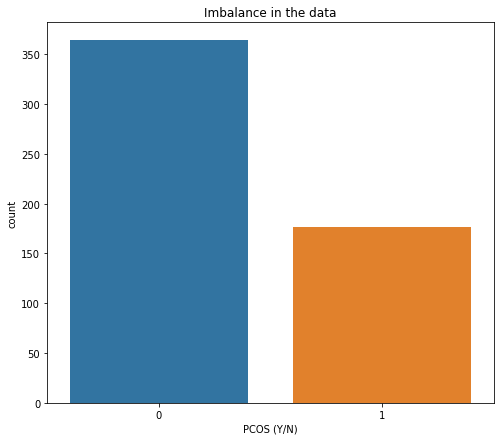

In [16]:
plt.figure(figsize=(8,7))
sns.countplot(x='PCOS (Y/N)',data=data)
plt.title('Imbalance in the data')
plt.show()

In [17]:
data['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

This shows high imbalance in data, people not having PCOS =364 and people diagnosed with PCOS =177

CORRELATION MATRIX OF THE DATA:

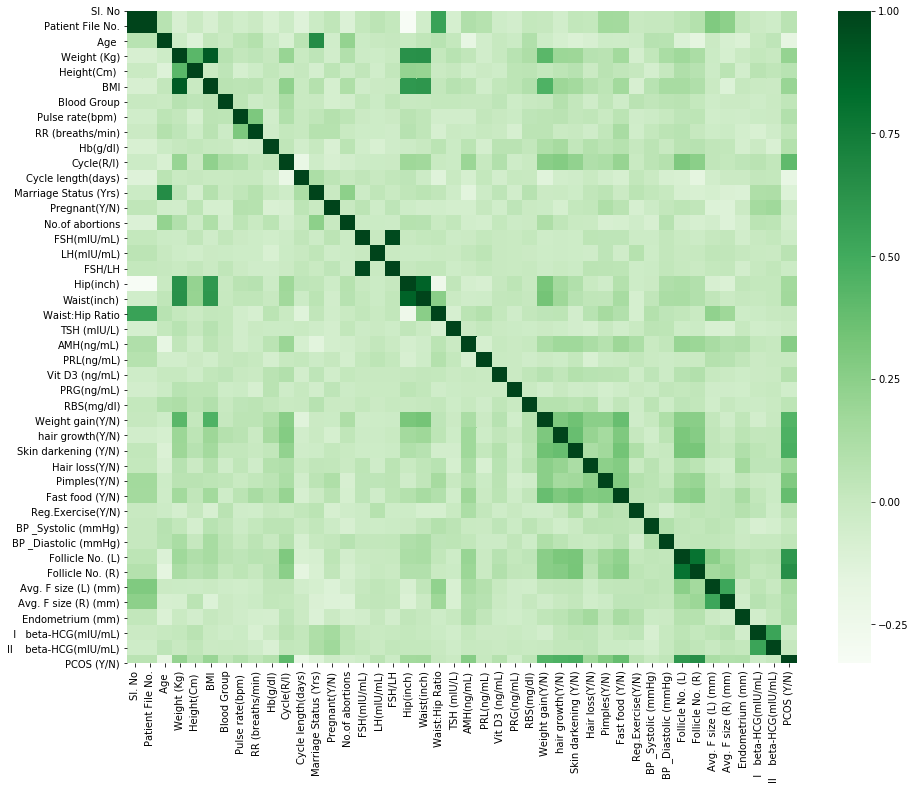

In [18]:
plt.figure(figsize=(15,12))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Greens)
plt.show()

In [19]:
 data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
Patient File No.,541.0,10271.000000,156.317519,10001.000000,10136.000000,10271.000000,10406.000000,10541.000000
Age,541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Blood Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000


### Checking for Multicollinearity:
   This is carried out using Variance Inflation Factor.
   
   Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity.It measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.
   
  
It is obtained by regressing each independent variable, say X on the remaining independent variables (say Y and Z) and checking how much of it (of X) is explained by these variables.

                 VIF = 1/(1-R^2)            


In [21]:
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor    
vif = pd.DataFrame()
X = x
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Patient File No.,74912.94
19,Waist(inch),460.30
18,Hip(inch),457.98
3,Weight (Kg),209.34
5,BMI,173.14
20,Waist:Hip Ratio,114.27
0,Sl. No,80.11
4,Height(Cm),39.12
17,FSH/LH,19.63
15,FSH(mIU/mL),19.62


We observe that exactly 10 feature variables have vif > 5

In [22]:
x.columns

Index(['Sl. No', 'Patient File No.', ' Age ', 'Weight (Kg)', 'Height(Cm) ',
       'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)',
       'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No.of abortions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)'],
      dtype='object')

In [23]:
columns = ('Sl. No', 'Patient File No.', ' Age ', 'Weight (Kg)', 'Height(Cm) ',
       'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)',
       'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No.of abortions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)')

In [24]:
x.drop(['Sl. No','Patient File No.','Weight (Kg)', 'Height(Cm) ', 'BMI','FSH(mIU/mL)','FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio'],axis=1,inplace=True)

In [25]:
x.shape

(541, 33)

Now,after dropping feature variables which had, Variance Inflation Factor value greater than 5,the matrix of features has 541 rows and 33 columns.

In [26]:
x.head()

,Age,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No.of abortions,...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,28,15,78,22,10.48,2,5,7.0,0,0,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,36,15,74,20,11.70,2,5,11.0,1,0,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,33,11,72,18,11.80,2,5,10.0,1,0,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,37,13,72,20,12.00,2,5,4.0,0,0,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,25,11,72,18,10.00,2,5,1.0,1,0,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


In [27]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

### Logistic Regression:

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables.

## Dimentionality Reduction :
### Feature selection technique - RECURSIVE FEATURE ELIMINATION(RFE)

Recursive feature elimination (RFE) has been used to scissor the features in the dataset down to important ones,relevant to the target variable.

  Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or         features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.
  
Removing features of low importance can improve accuracy, and reduce both model complexity and overfitting. Training time can also be reduced for very large datasets.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
classifier = LogisticRegression(random_state = 0) #Creating the classifier of logistic regression

In [29]:
rfe=RFE(estimator=classifier,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [32]:
selected_rfe_features=pd.DataFrame({'Features':list(x_train.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Features,Ranking
26,Follicle No. (L),1
15,PRG(ng/mL),1
18,hair growth(Y/N),1
19,Skin darkening (Y/N),1
20,Hair loss(Y/N),1
21,Pimples(Y/N),1
22,Fast food (Y/N),1
27,Follicle No. (R),1
8,Pregnant(Y/N),1
6,Cycle length(days),1


In [33]:
print('Selected features: %s' % list(x_train.columns[rfe.support_]))

Selected features: ['RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Pregnant(Y/N)', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']


Taking the first 15 variables with rank 1 and transforming the training set and 
the test set of the x matrix of features

In [34]:
x_train_rfe=rfe.transform(x_train)
x_test_rfe=rfe.transform(x_test)

In [35]:
#Creating a DataFrame of the transformed Training set
d_train_rfe=pd.DataFrame(x_train_rfe,columns=['RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Pregnant(Y/N)', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)'])
data_refined=pd.concat([d_train_rfe,y_train],axis=1)
data_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 540
Data columns (total 16 columns):
RR (breaths/min)        432 non-null float64
Hb(g/dl)                432 non-null float64
Cycle(R/I)              432 non-null float64
Cycle length(days)      432 non-null float64
Pregnant(Y/N)           432 non-null float64
PRG(ng/mL)              432 non-null float64
Weight gain(Y/N)        432 non-null float64
hair growth(Y/N)        432 non-null float64
Skin darkening (Y/N)    432 non-null float64
Hair loss(Y/N)          432 non-null float64
Pimples(Y/N)            432 non-null float64
Fast food (Y/N)         432 non-null float64
Reg.Exercise(Y/N)       432 non-null float64
Follicle No. (L)        432 non-null float64
Follicle No. (R)        432 non-null float64
PCOS (Y/N)              432 non-null float64
dtypes: float64(16)
memory usage: 68.8 KB


## DATA VISUALIZATION:
### This is carried out using the transformed training set

CORRELATION MATRIX OF THE FEATURES:

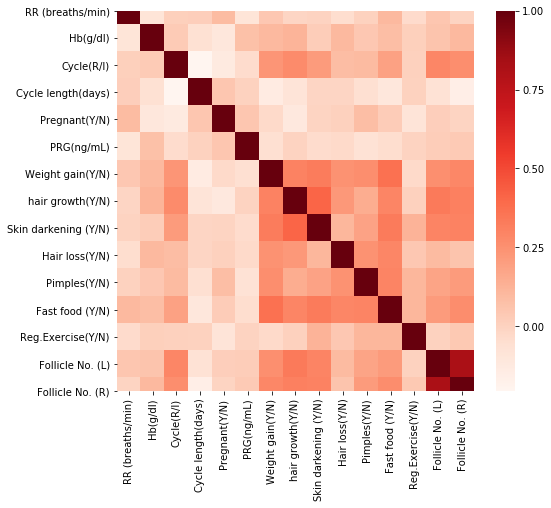

In [36]:
plt.figure(figsize=(8,7))
cor = d_train_rfe.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

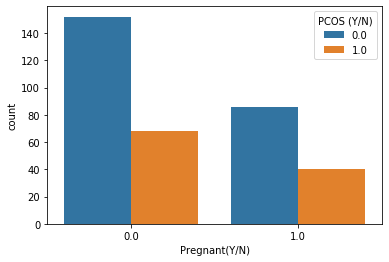

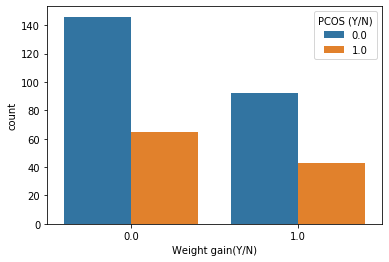

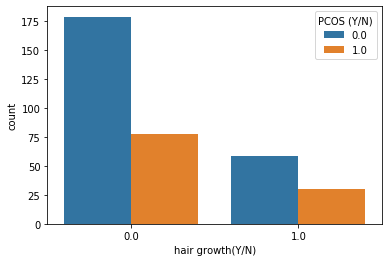

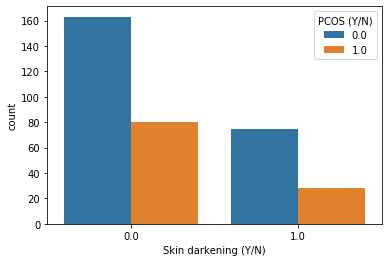

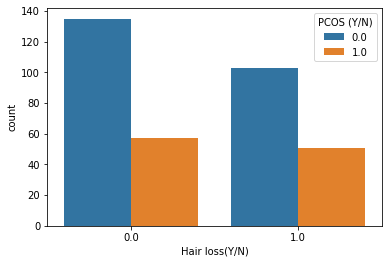

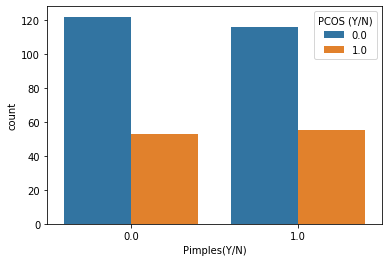

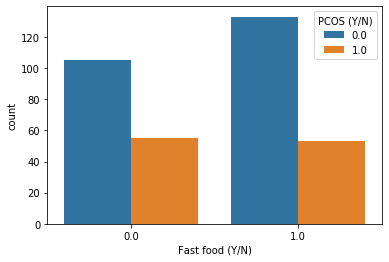

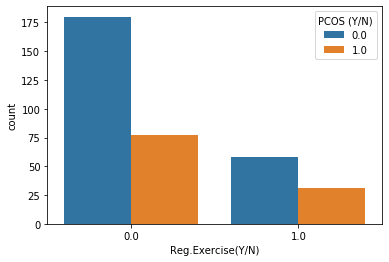

In [37]:
features=[ 'Pregnant(Y/N)','Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)','Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
for f in features:
    sns.countplot(x=f,data=data_refined,hue='PCOS (Y/N)')
    plt.show()


We notice that:

 1)Lesser no.of pregnant women have PCOS
 
 2)PCOS is not much determined by pimples,hair loss and consumption of fast food
 
 3)Regular exercise reduces PCOS
 

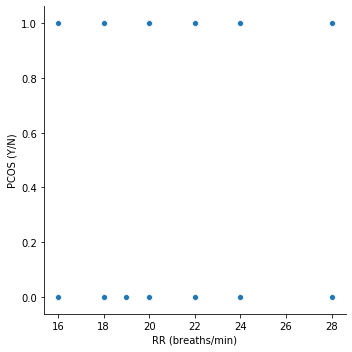

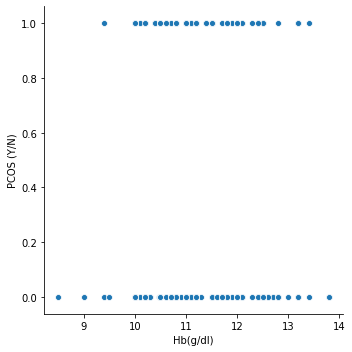

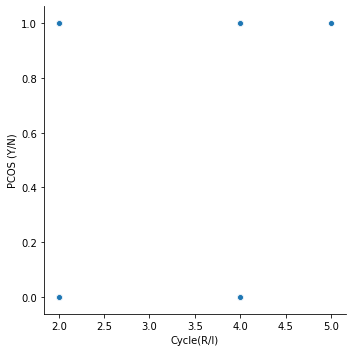

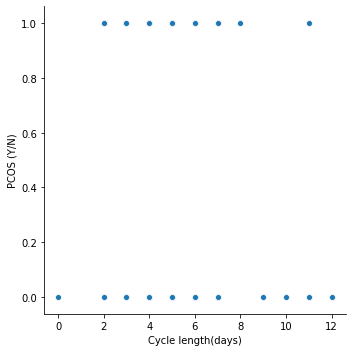

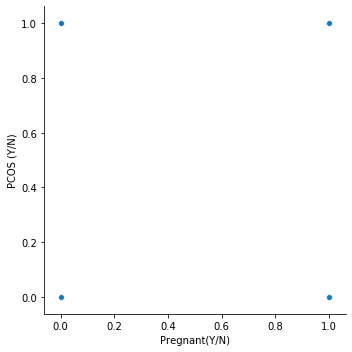

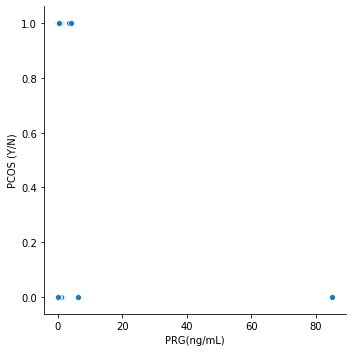

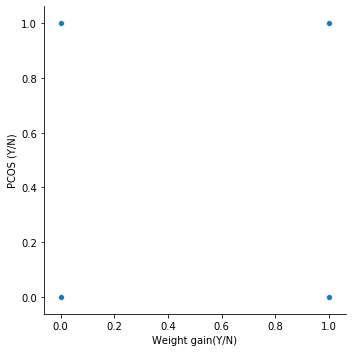

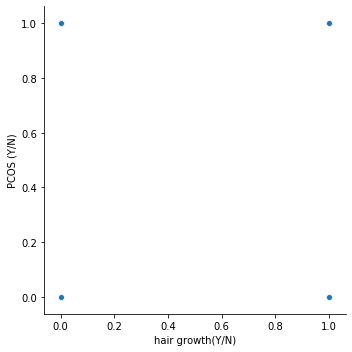

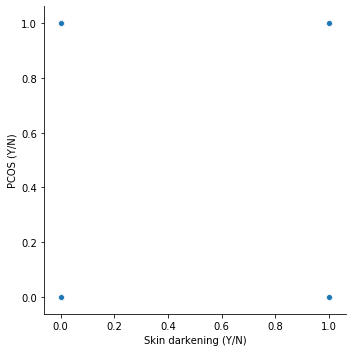

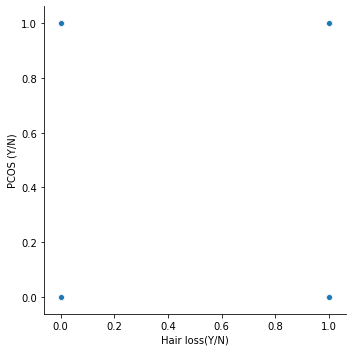

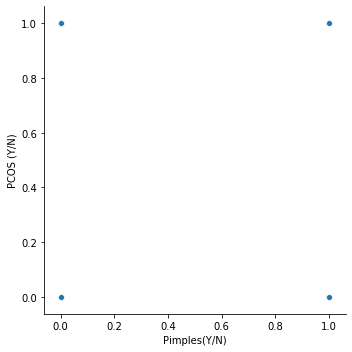

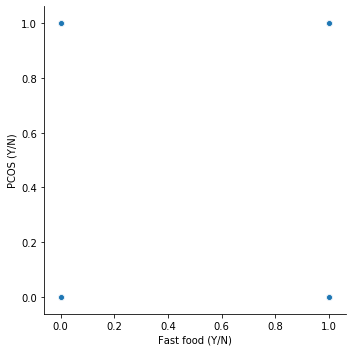

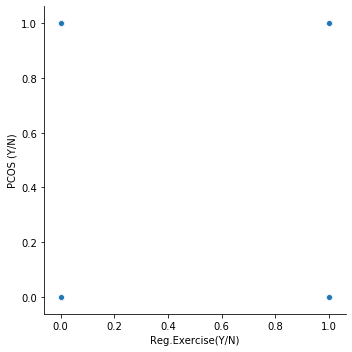

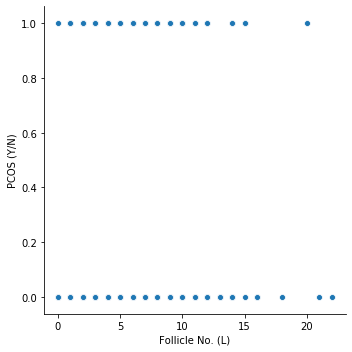

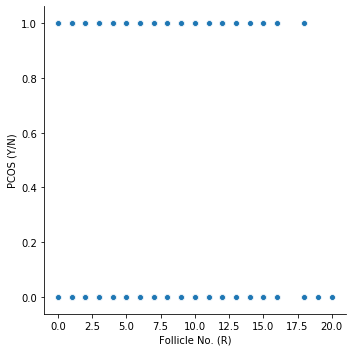

In [38]:
features1=['RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Pregnant(Y/N)', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)']
p=plt.Figure()
for f in features1:
    sns.relplot(x=f,y='PCOS (Y/N)',data=data_refined)
    plt.show()


The above graphs show how the different feature variables are related with the target variable i.e. PCOS (Y/N) 

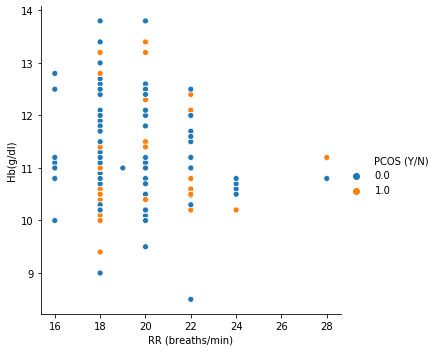

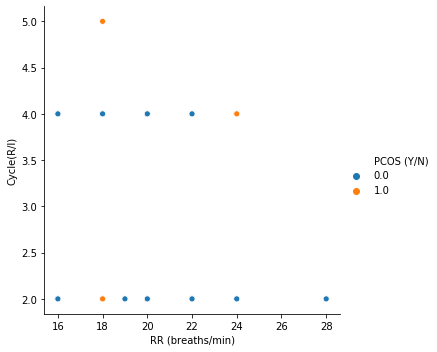

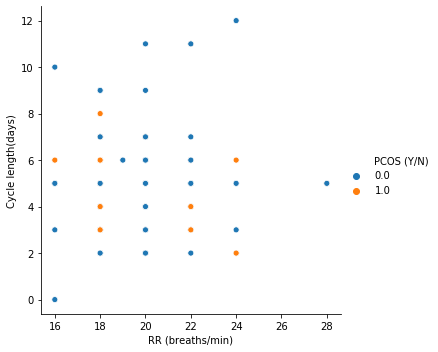

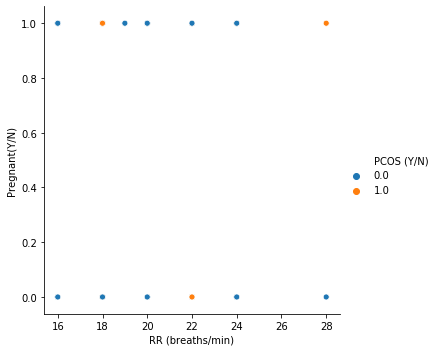

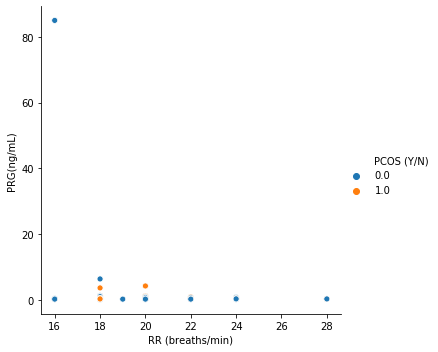

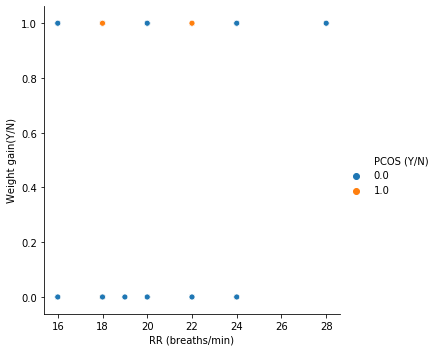

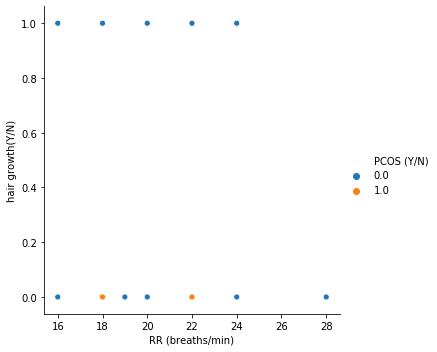

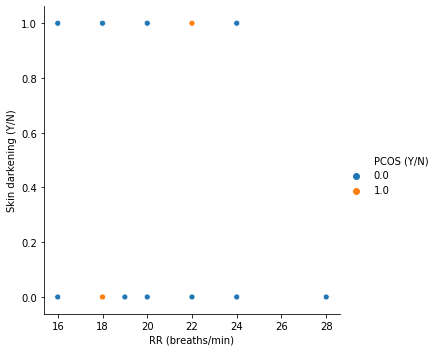

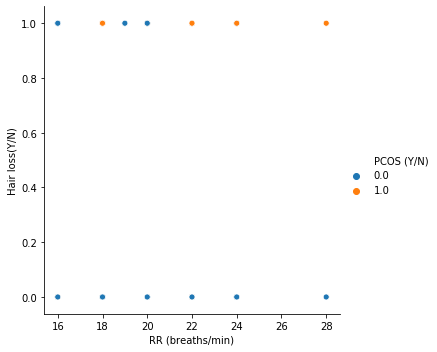

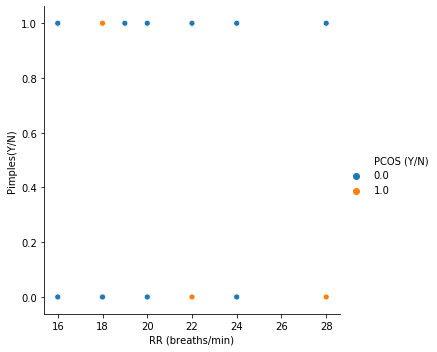

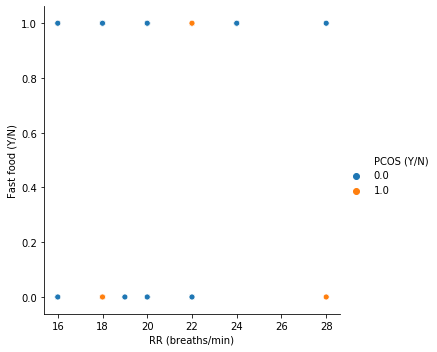

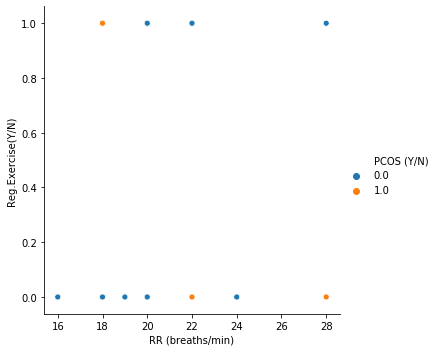

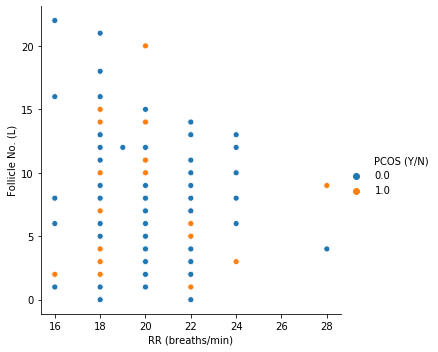

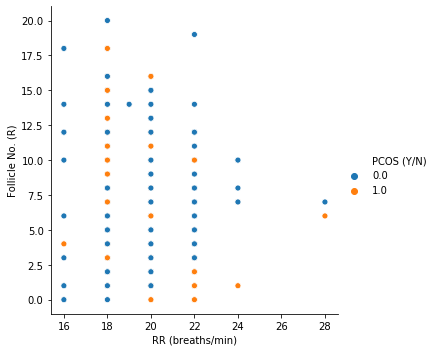

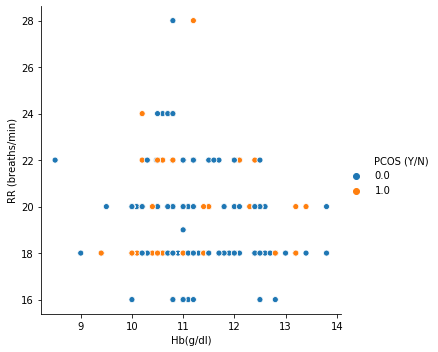

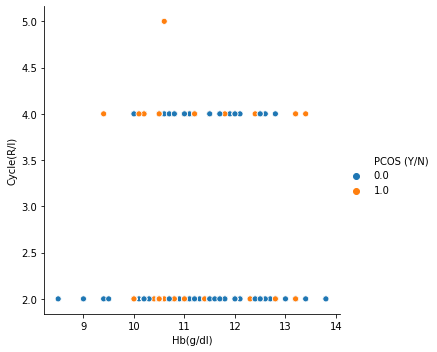

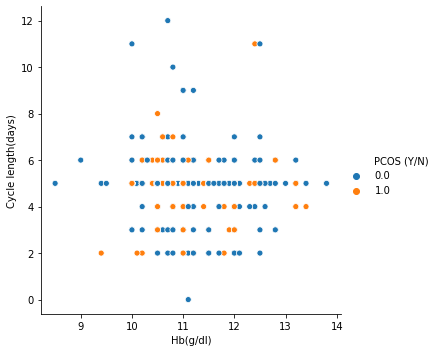

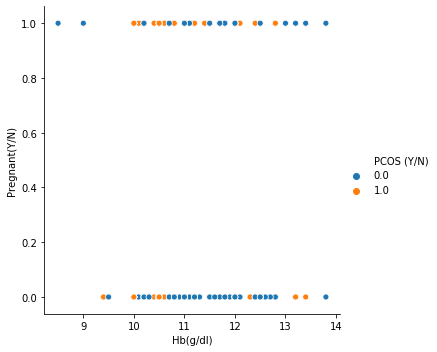

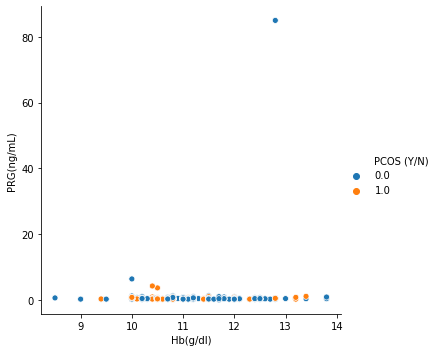

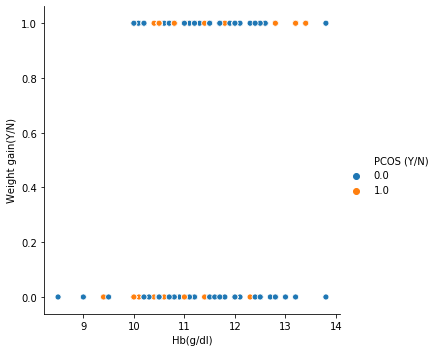

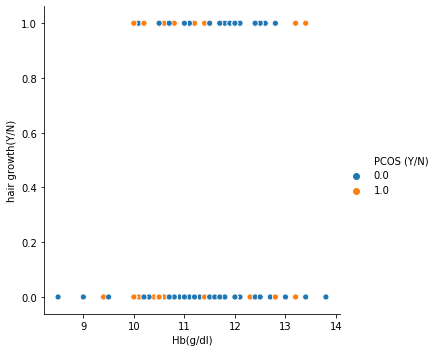

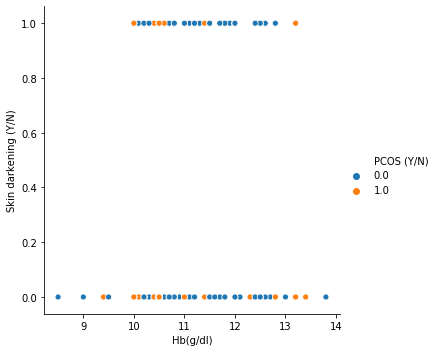

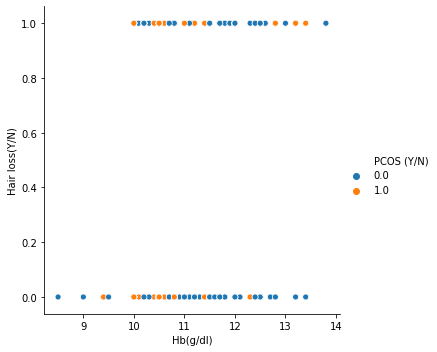

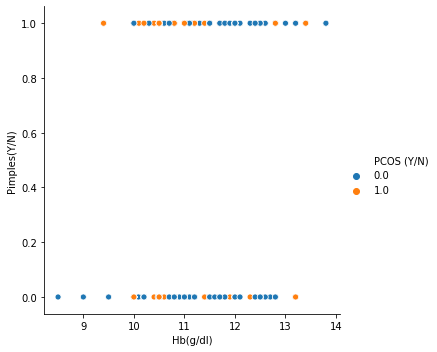

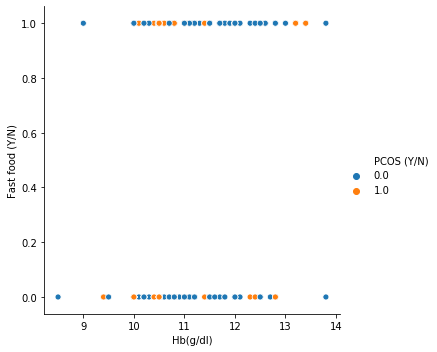

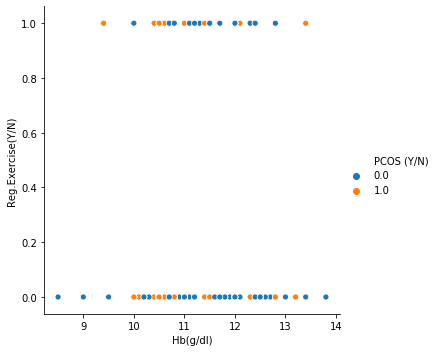

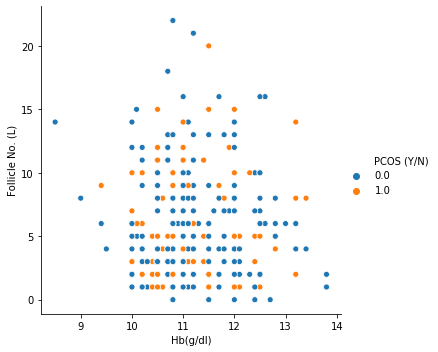

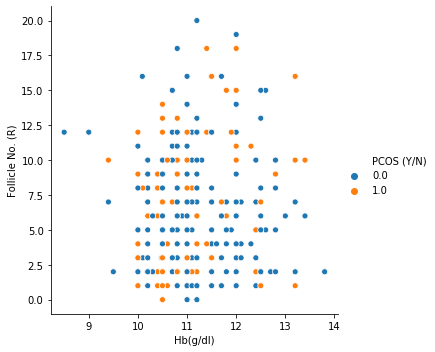

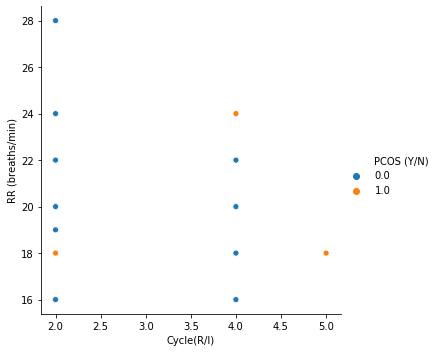

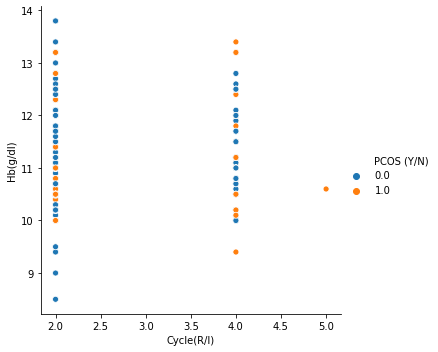

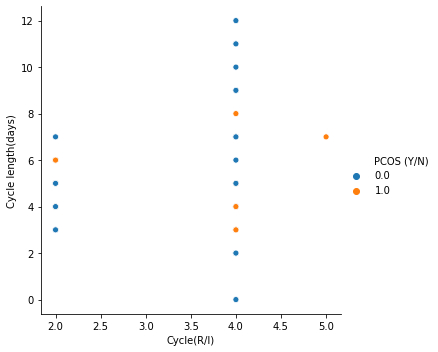

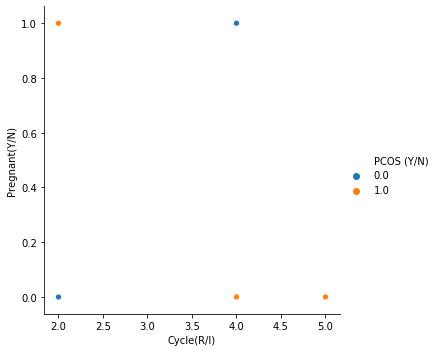

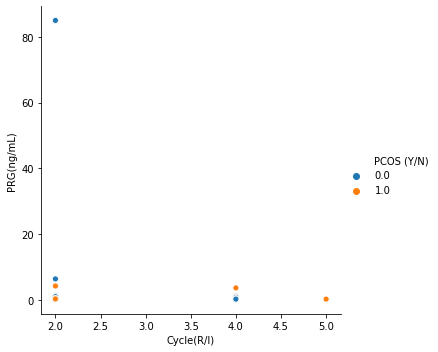

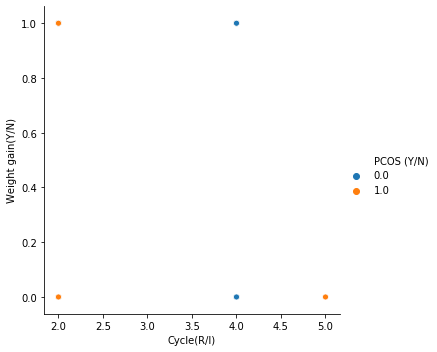

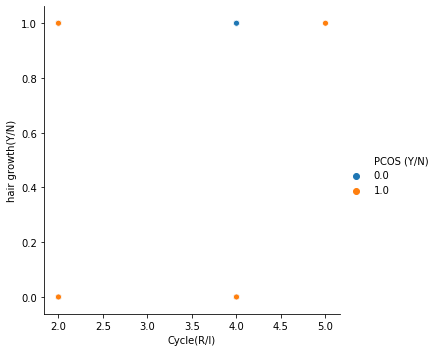

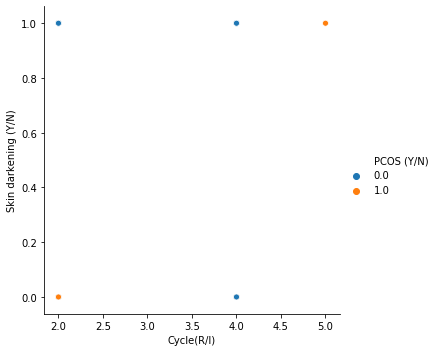

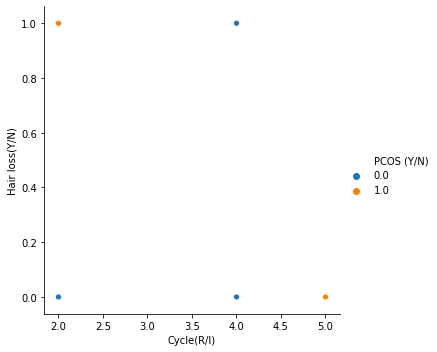

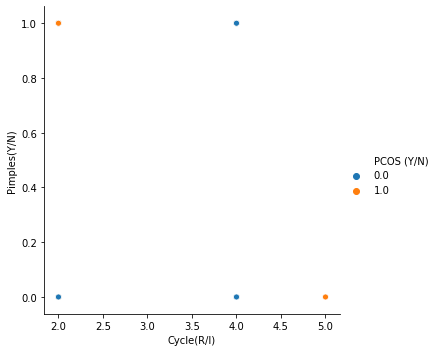

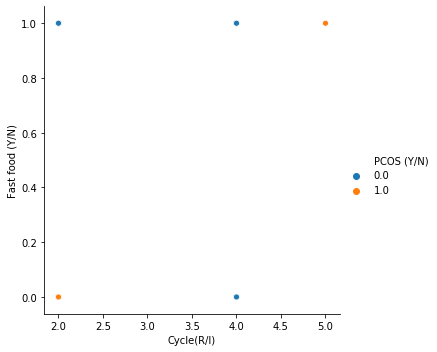

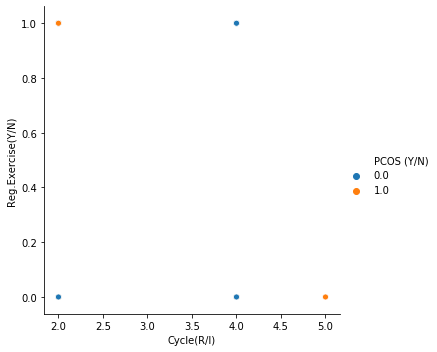

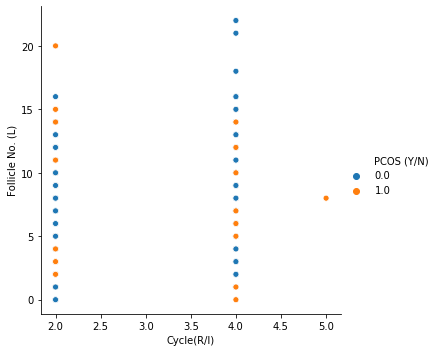

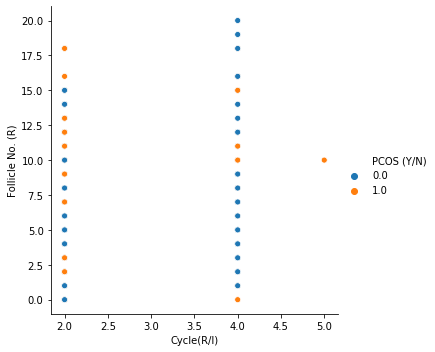

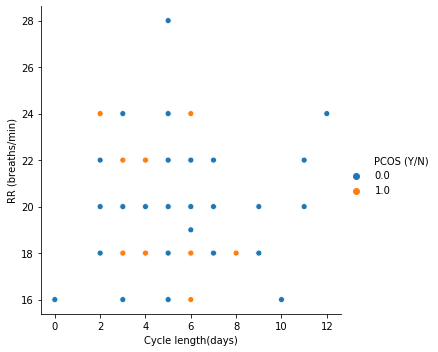

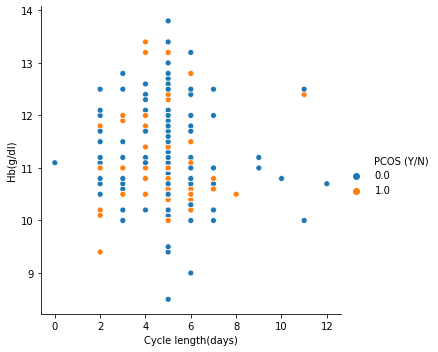

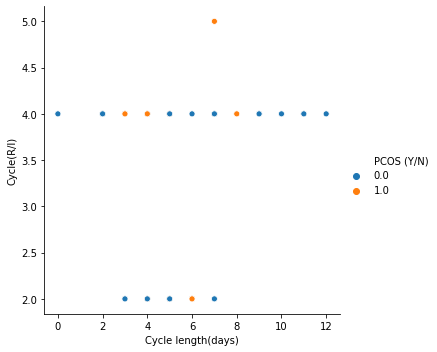

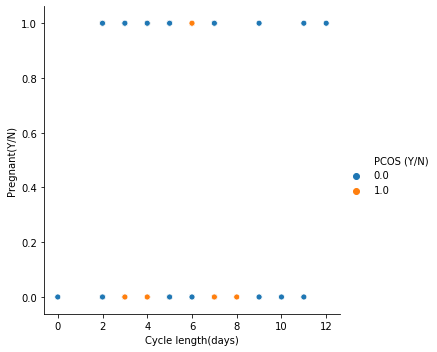

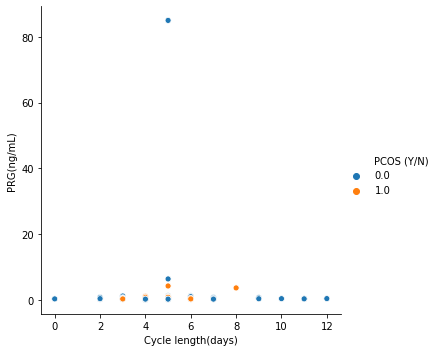

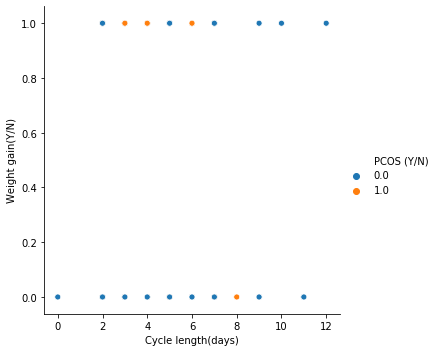

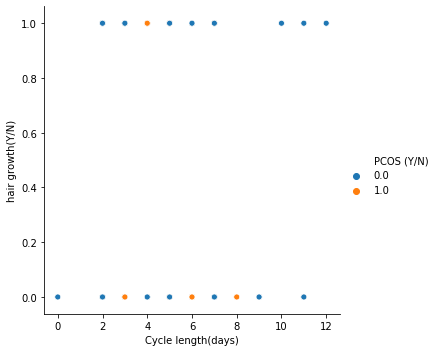

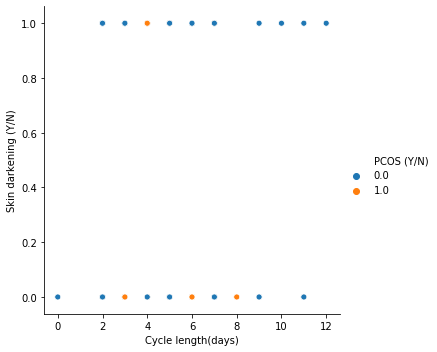

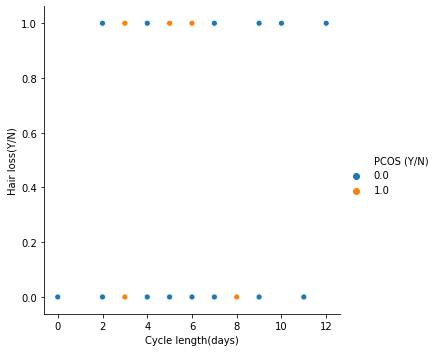

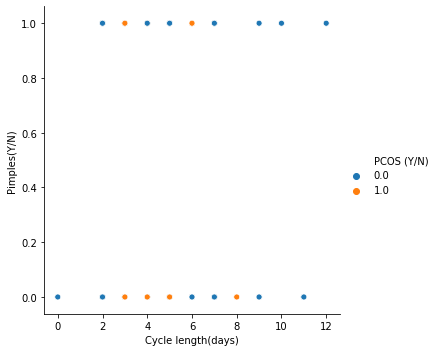

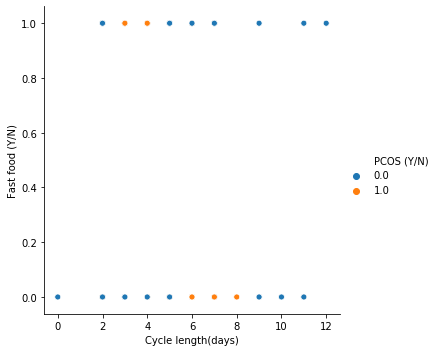

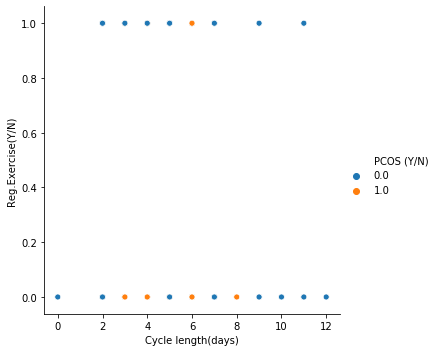

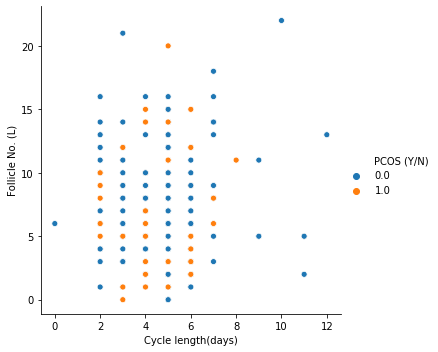

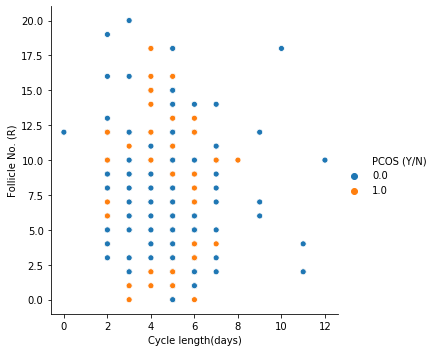

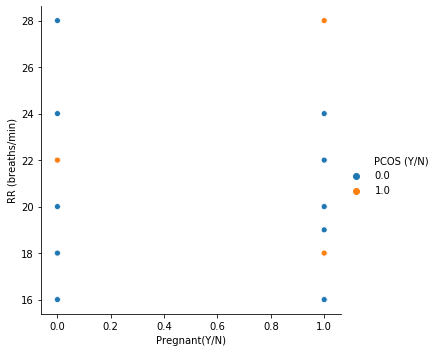

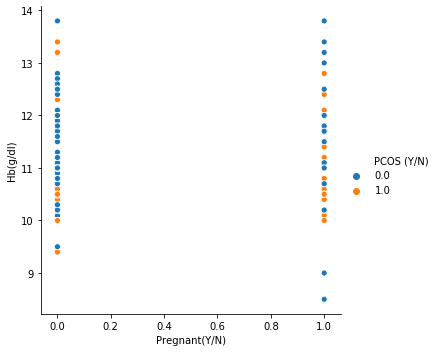

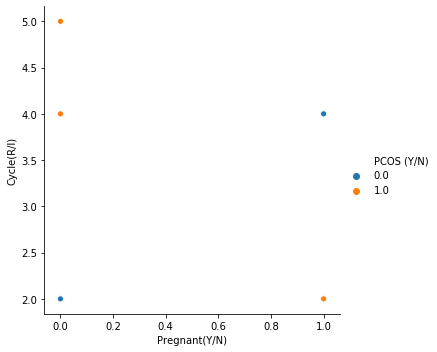

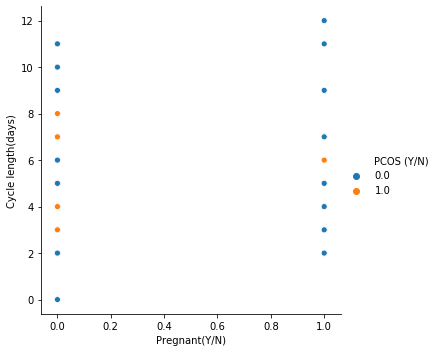

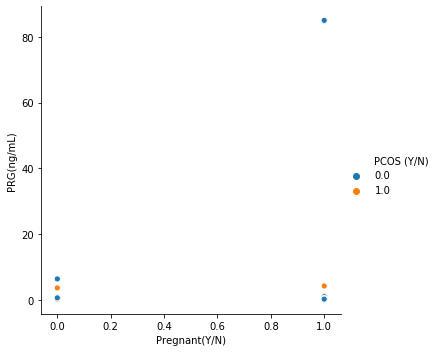

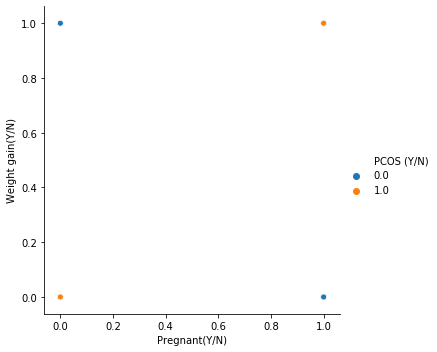

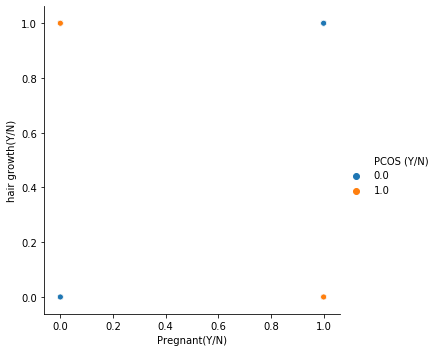

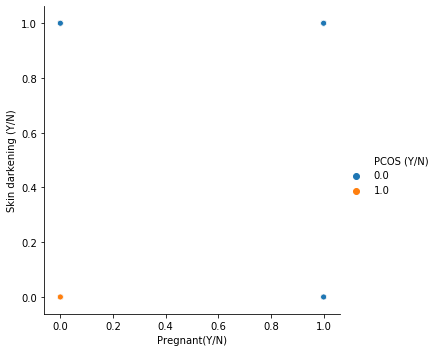

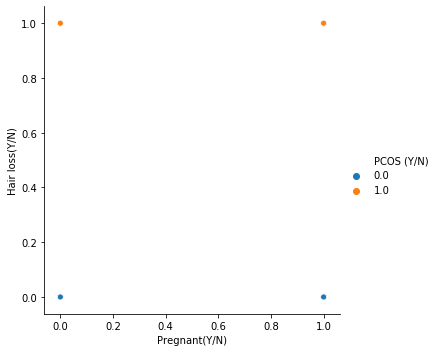

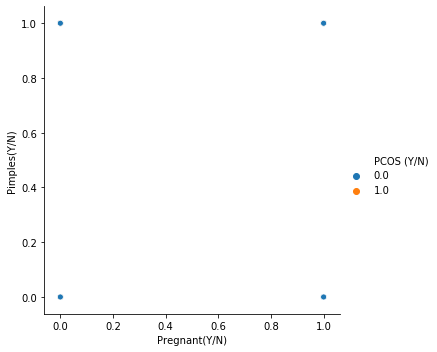

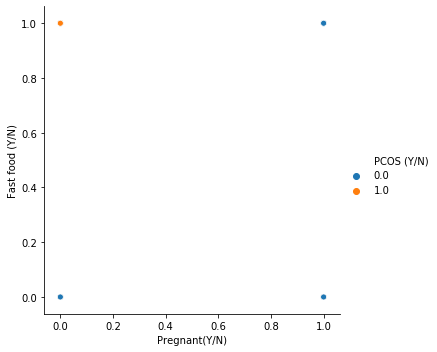

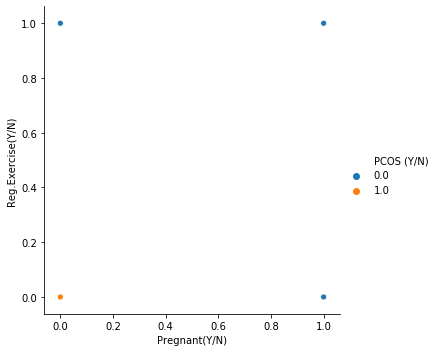

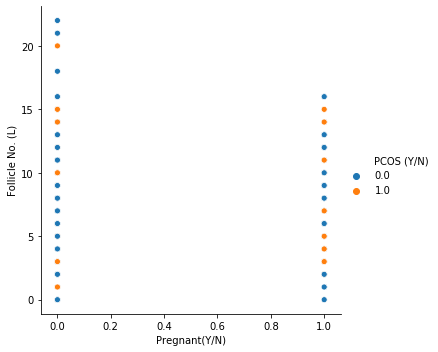

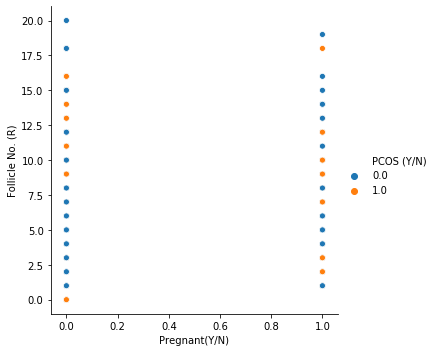

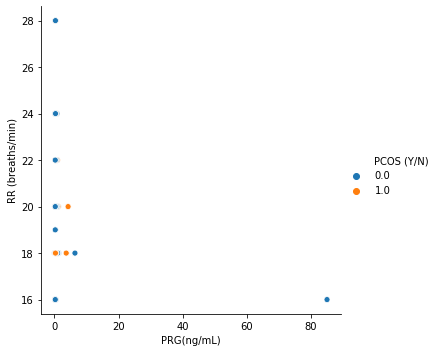

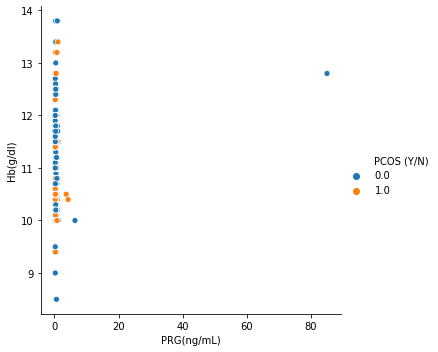

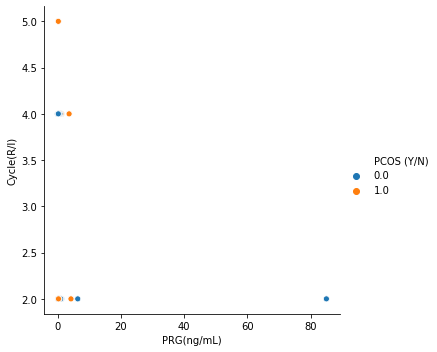

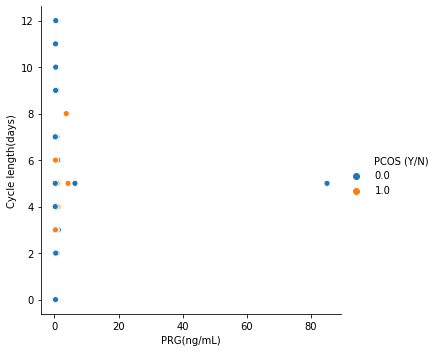

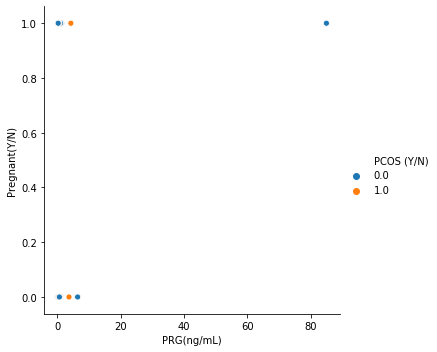

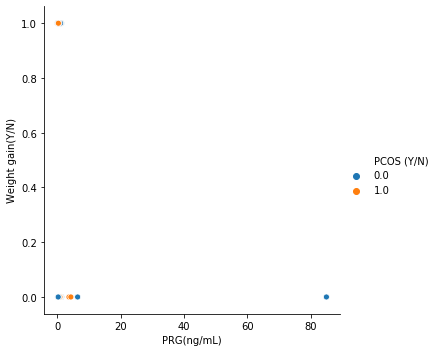

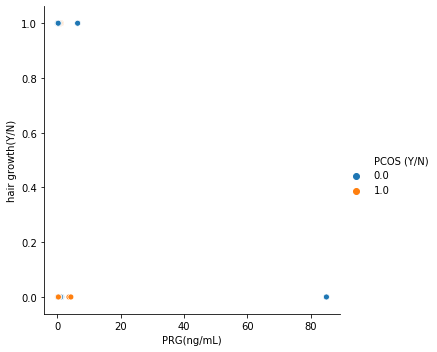

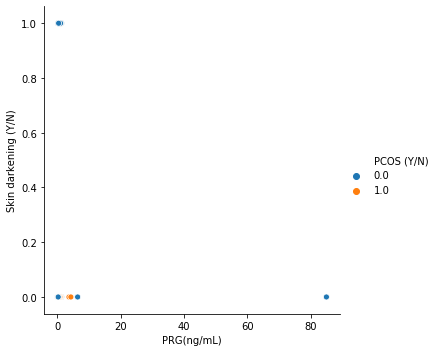

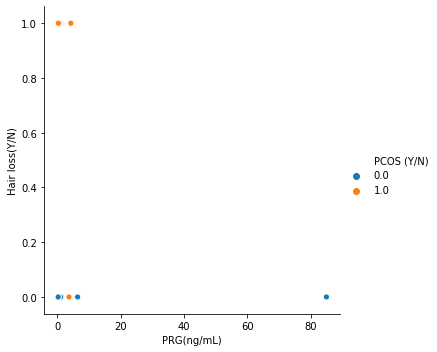

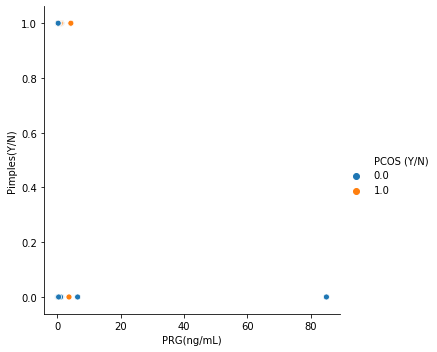

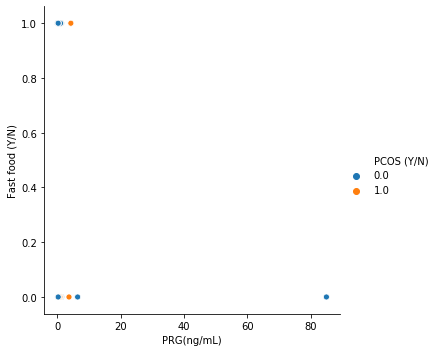

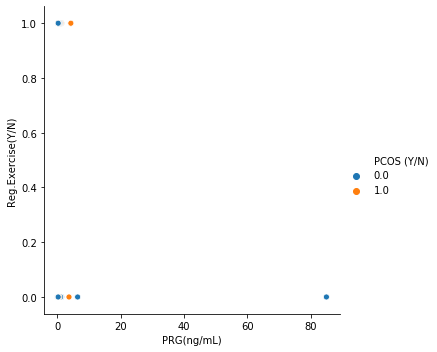

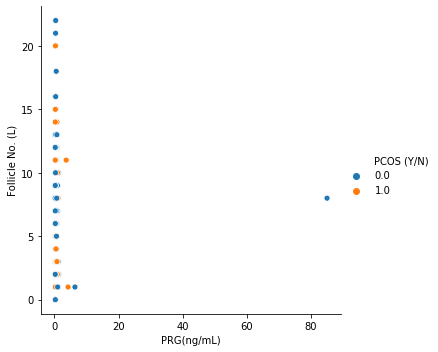

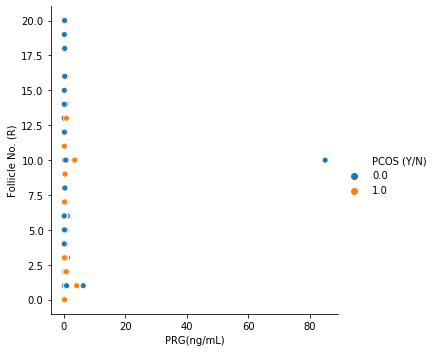

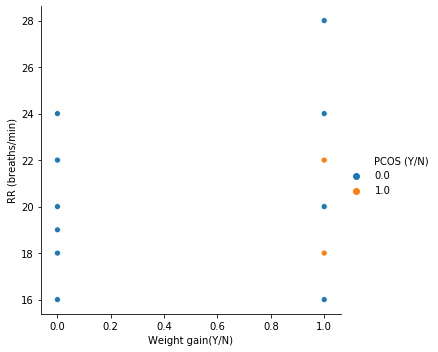

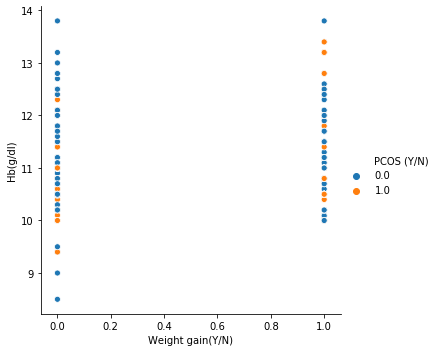

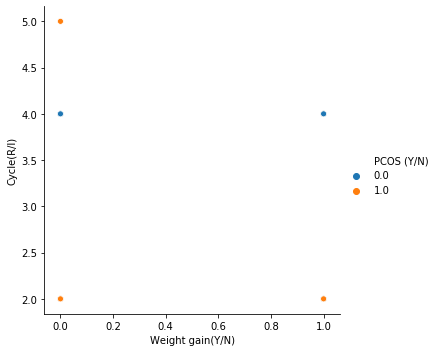

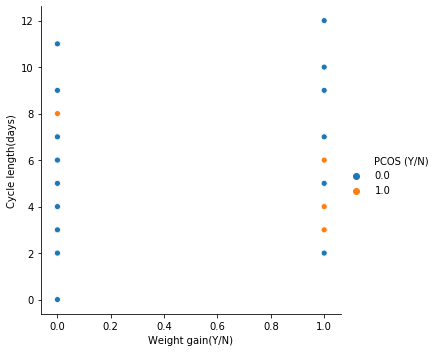

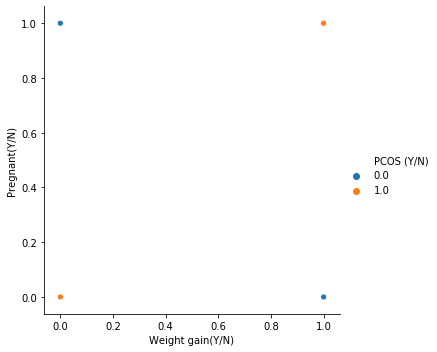

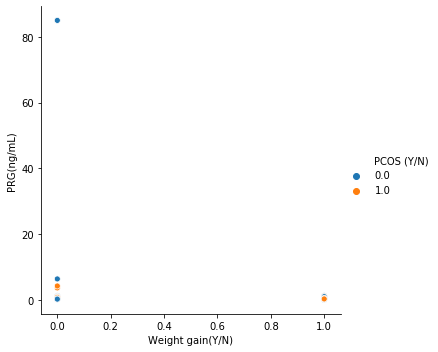

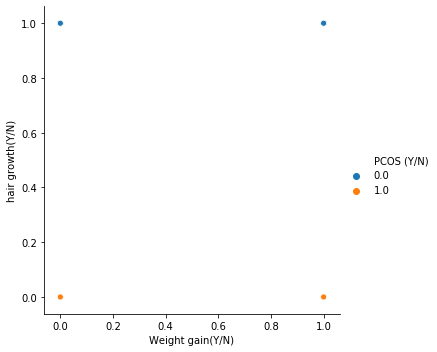

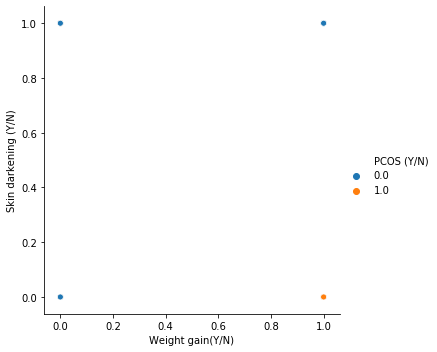

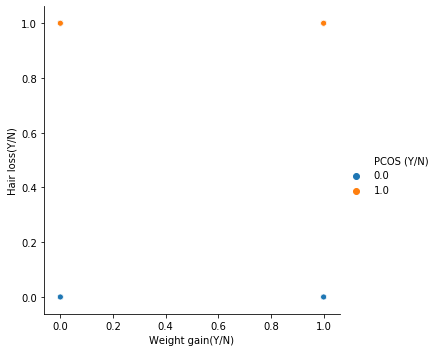

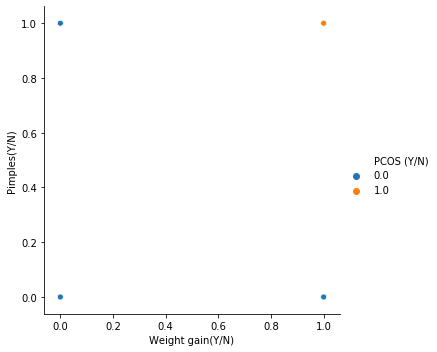

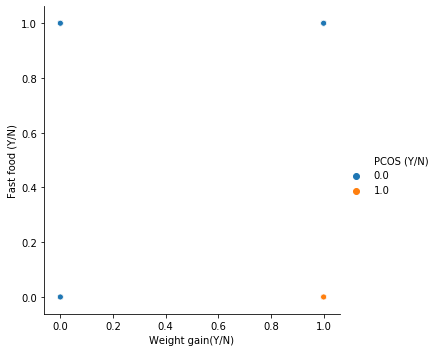

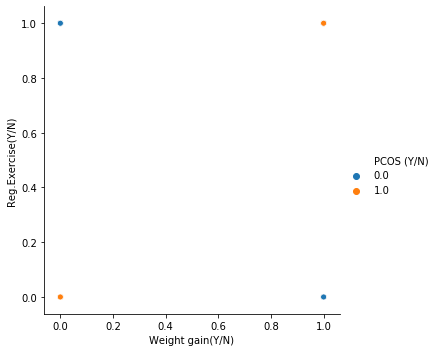

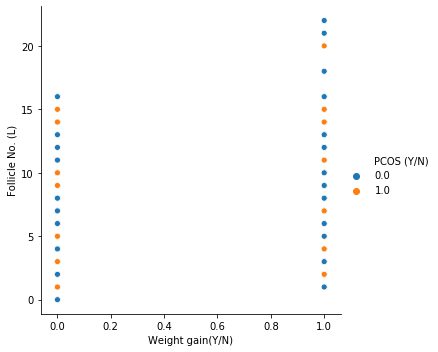

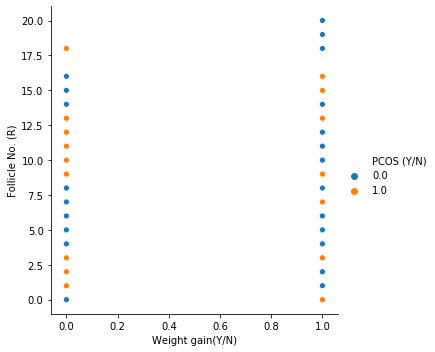

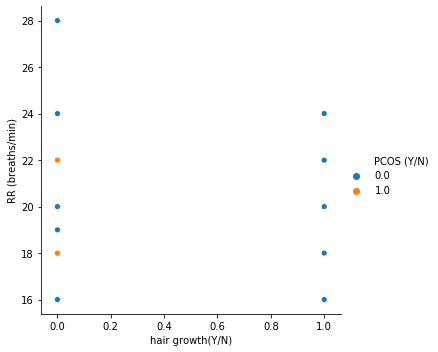

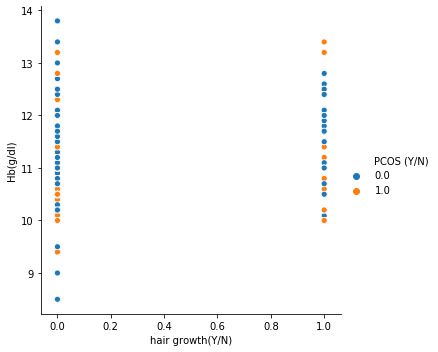

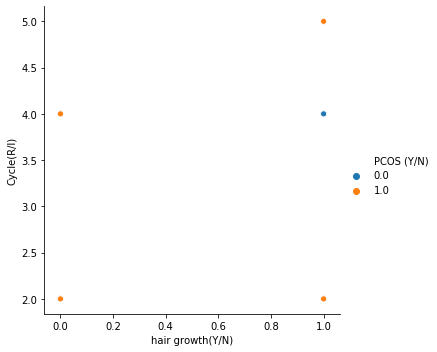

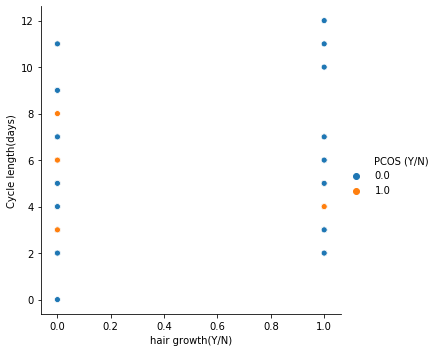

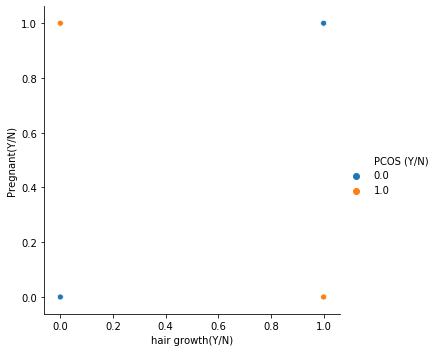

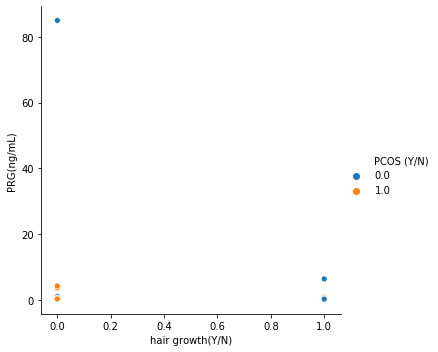

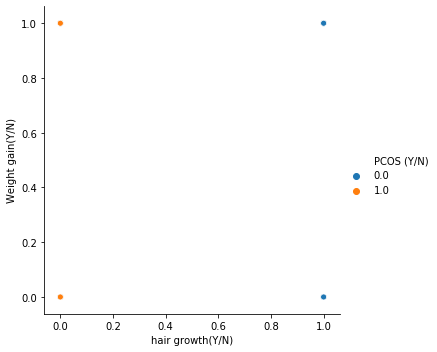

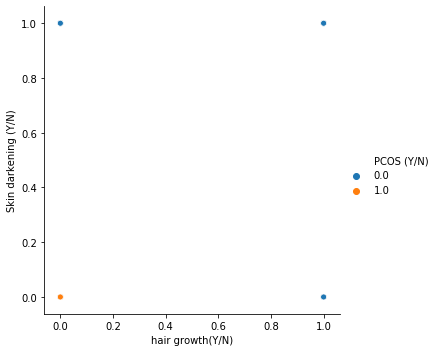

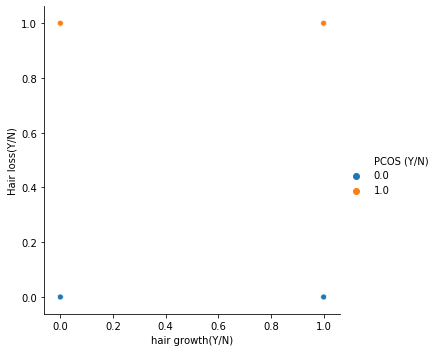

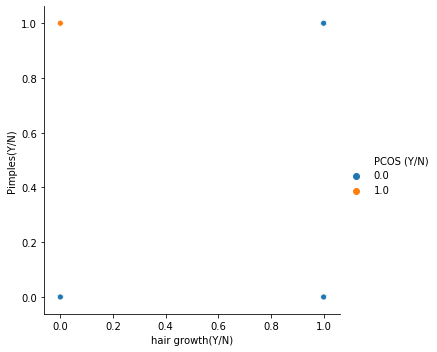

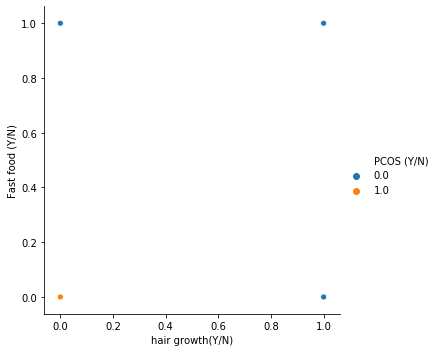

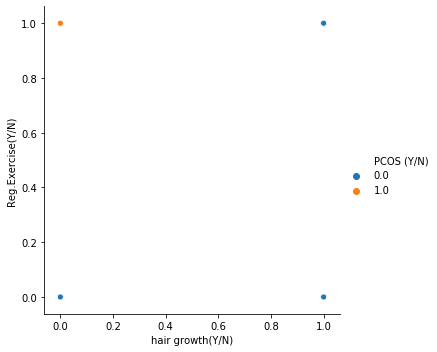

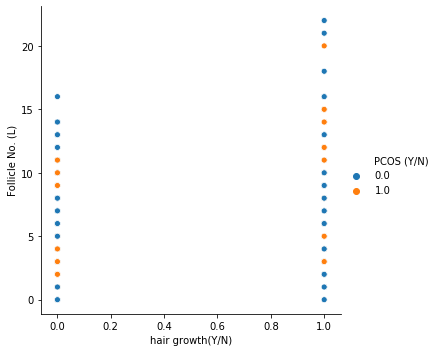

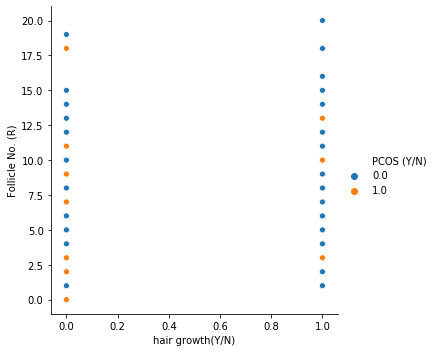

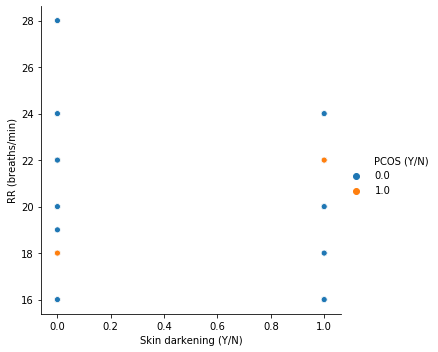

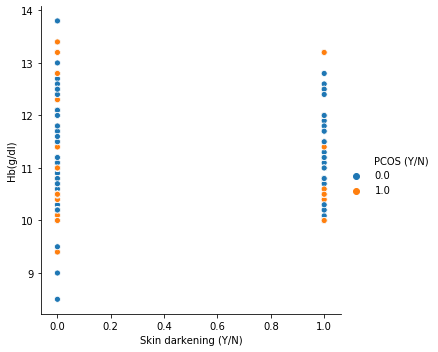

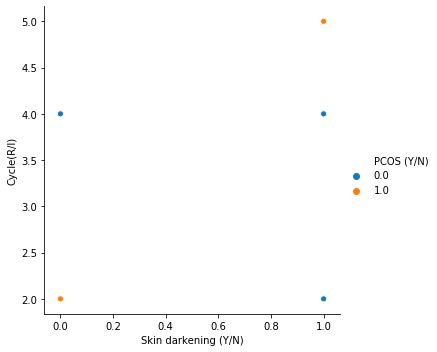

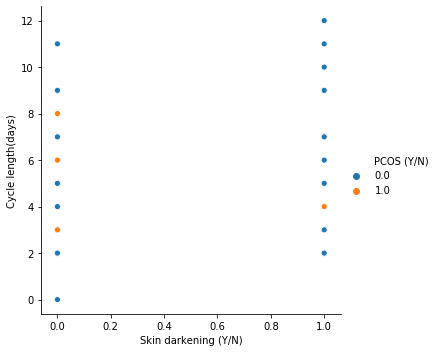

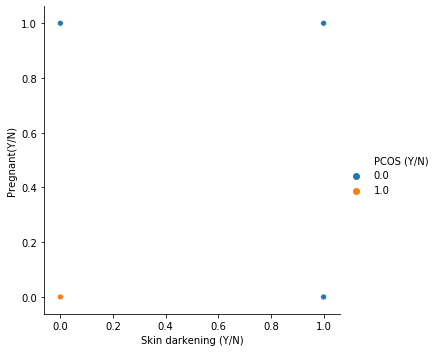

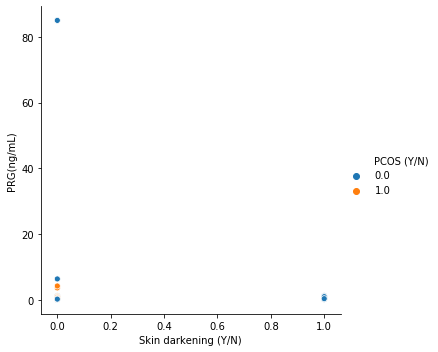

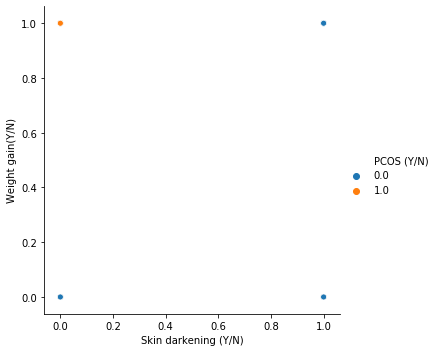

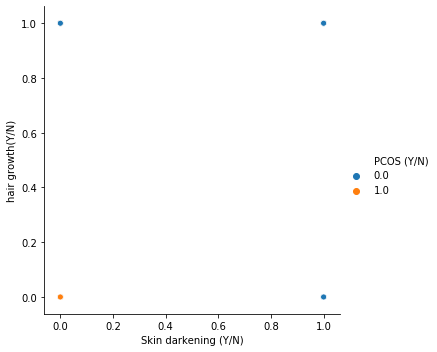

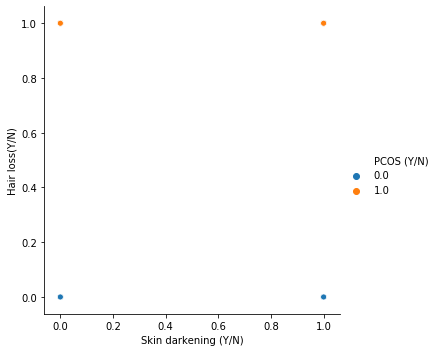

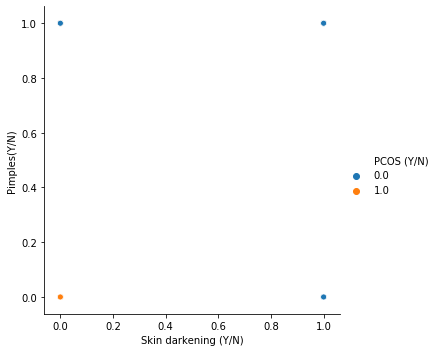

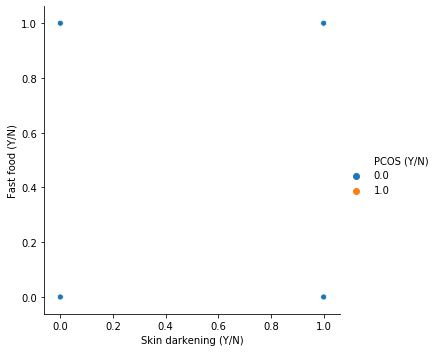

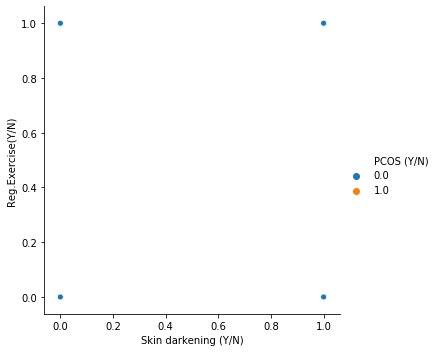

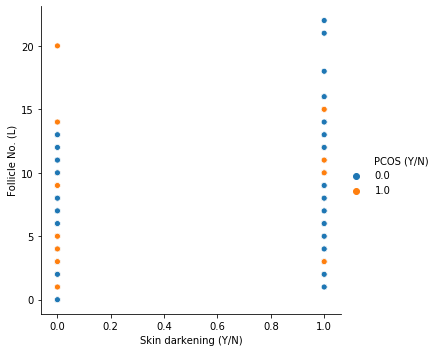

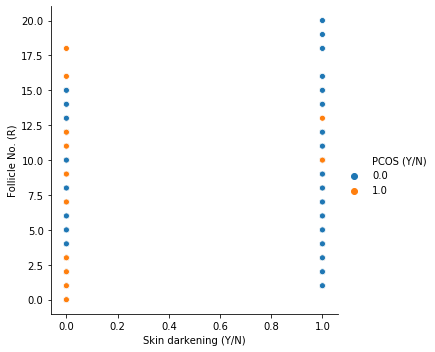

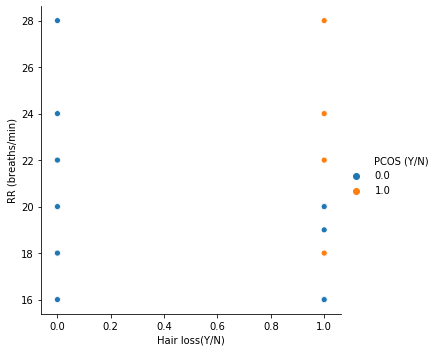

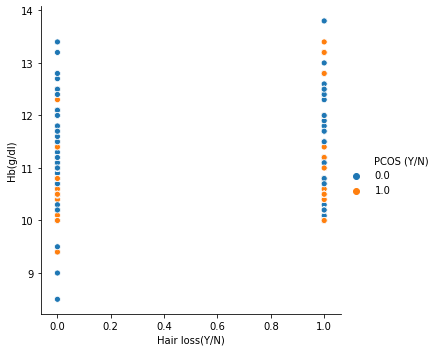

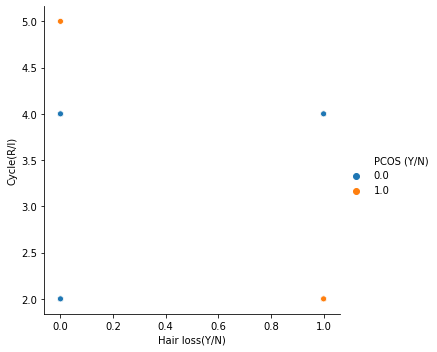

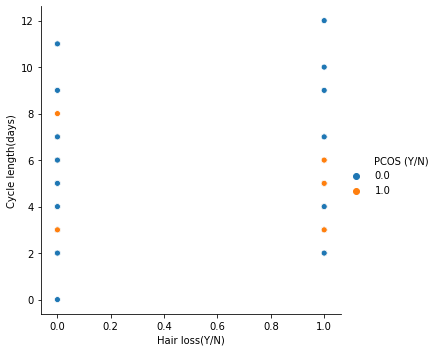

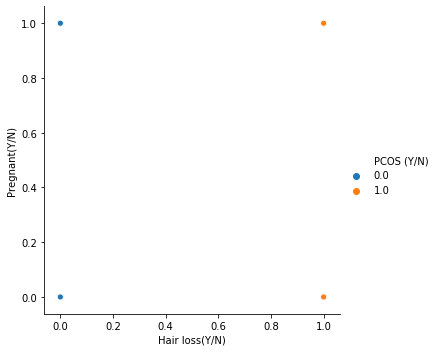

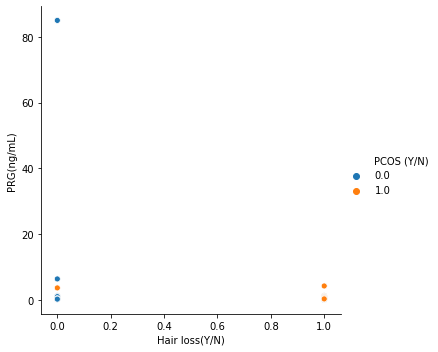

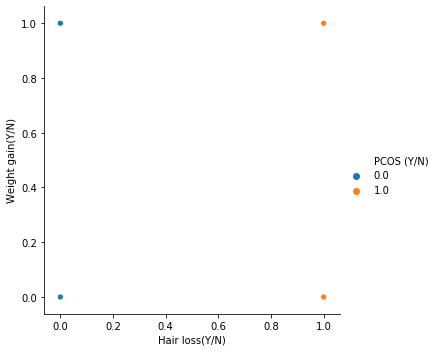

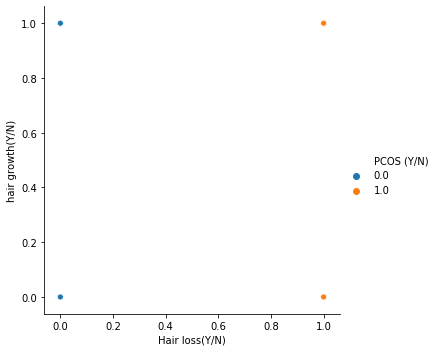

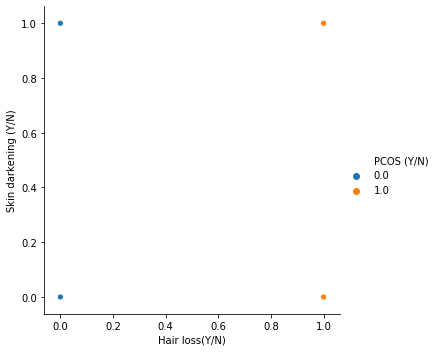

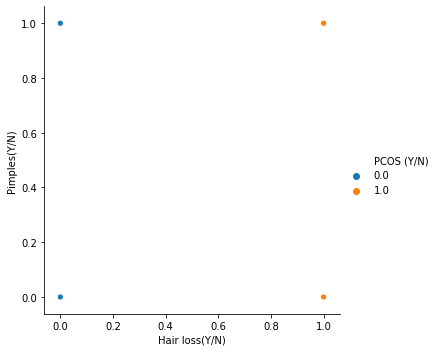

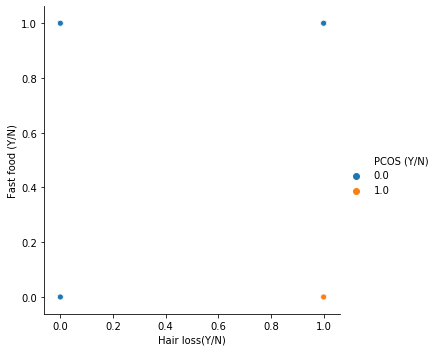

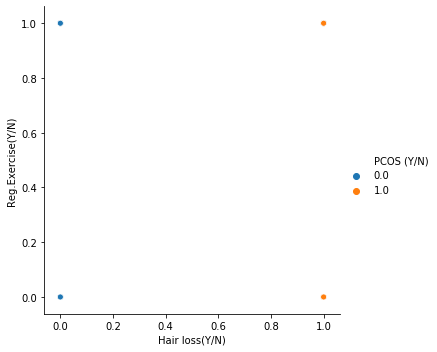

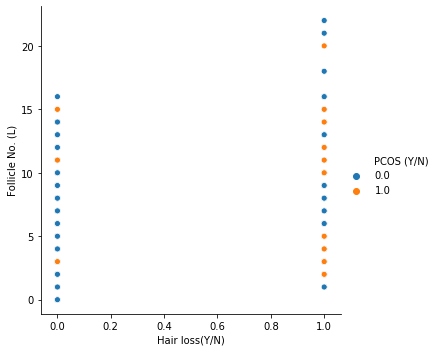

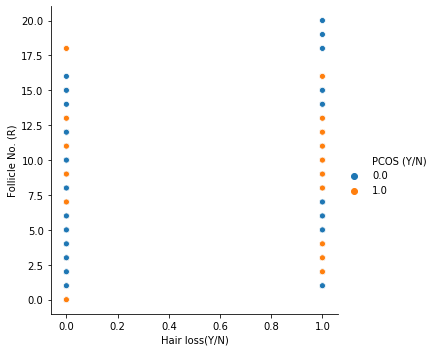

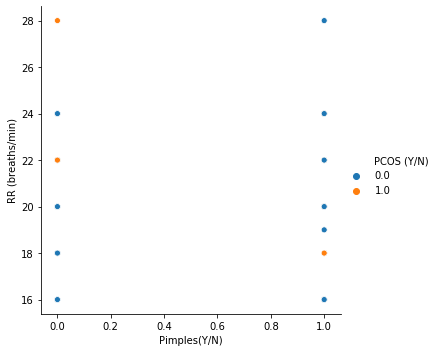

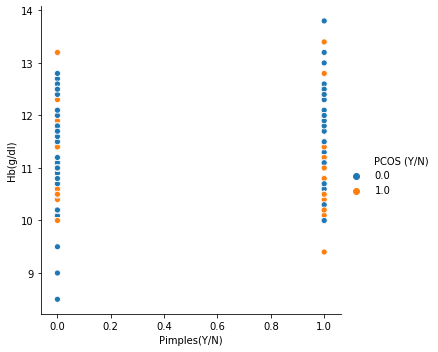

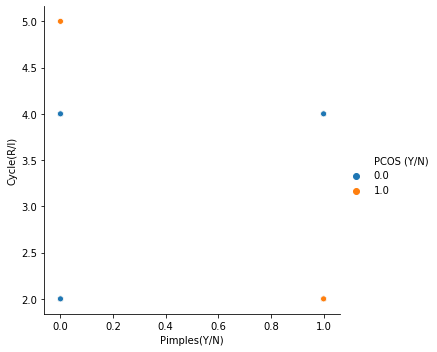

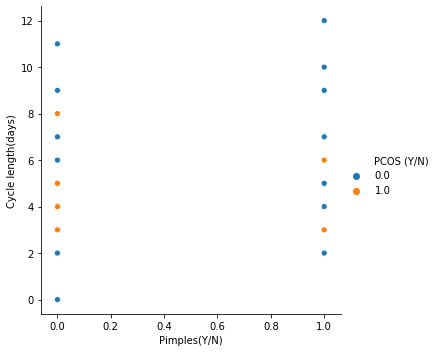

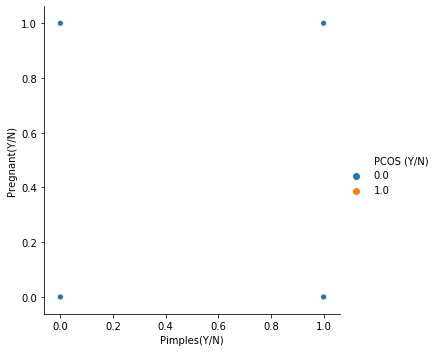

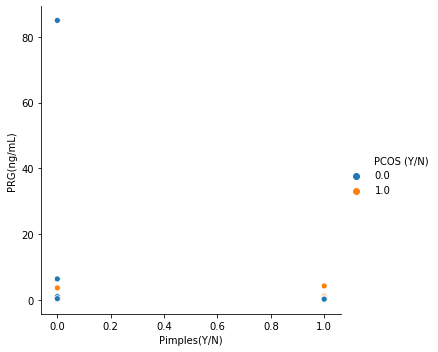

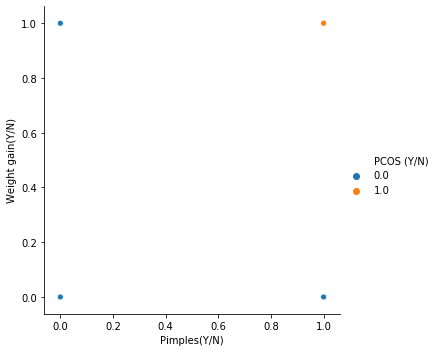

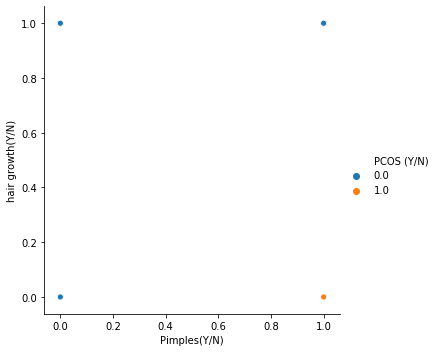

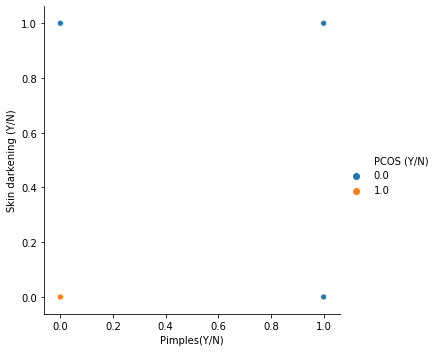

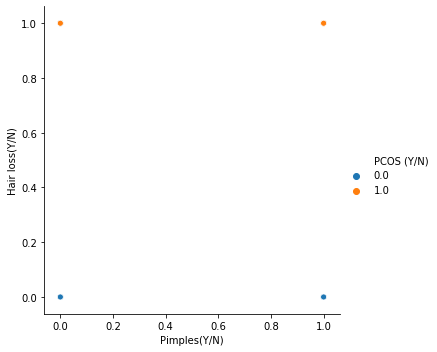

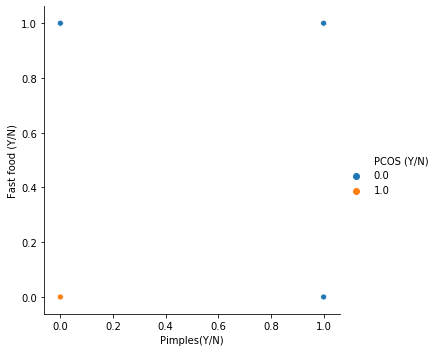

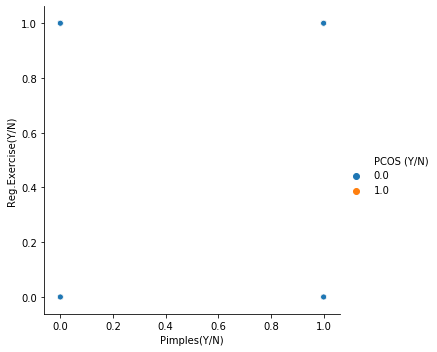

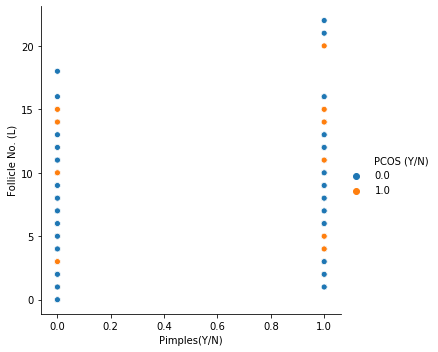

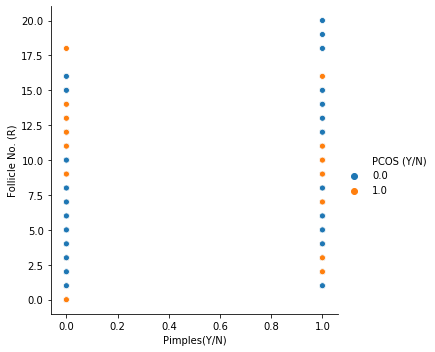

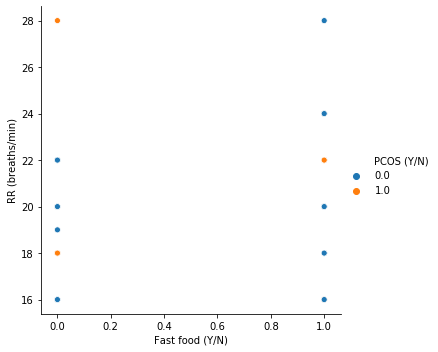

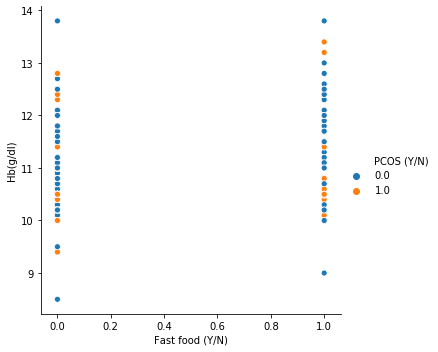

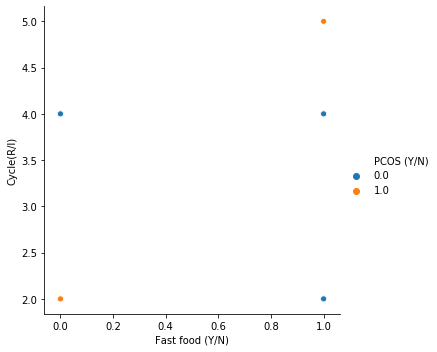

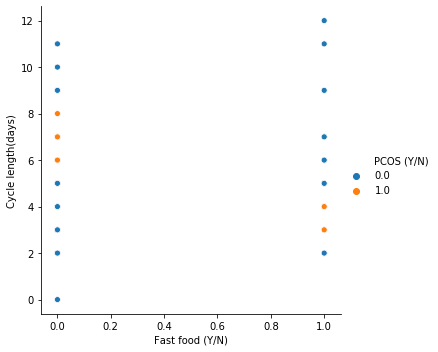

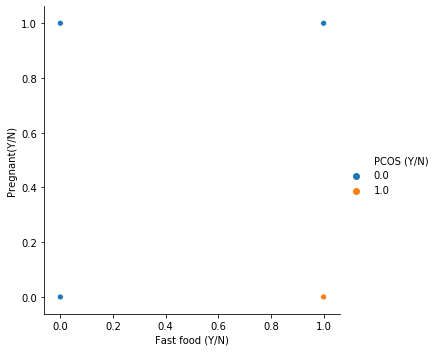

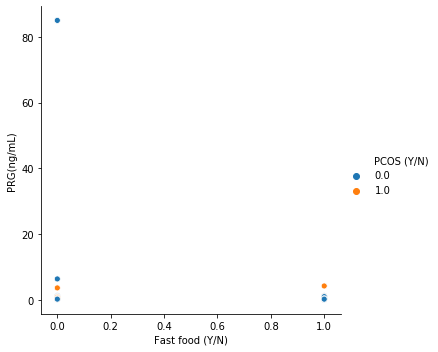

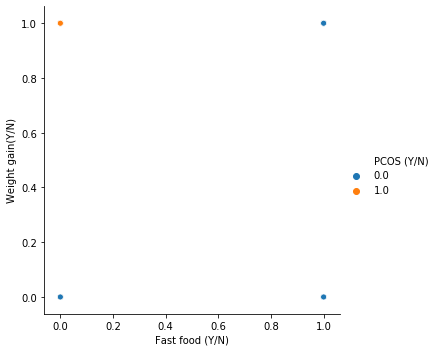

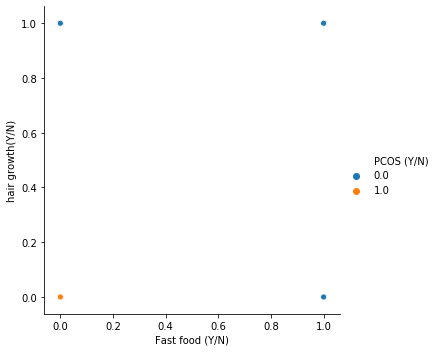

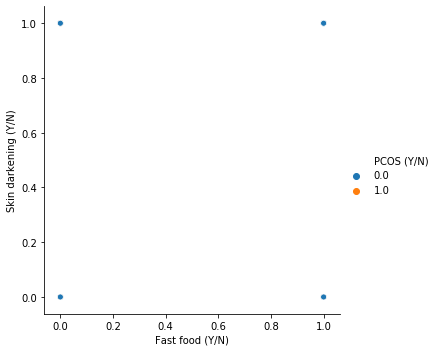

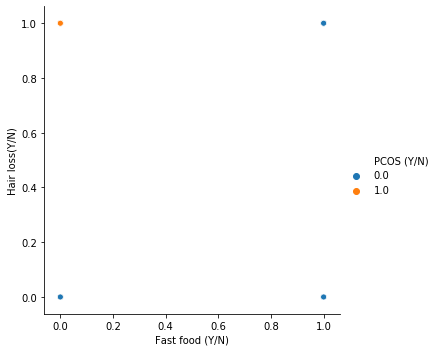

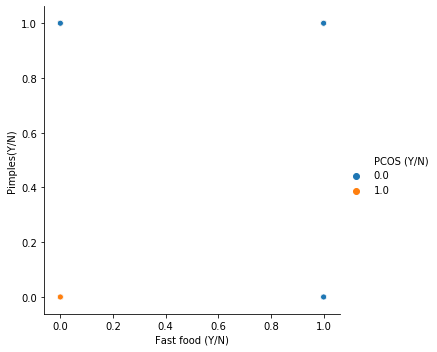

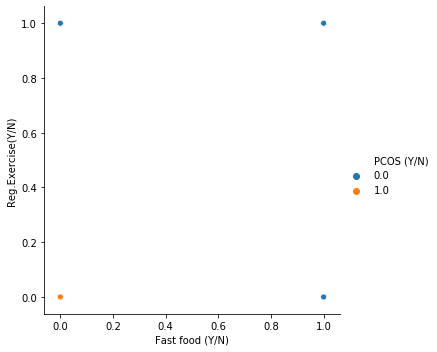

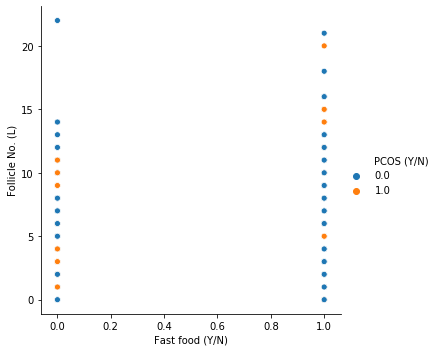

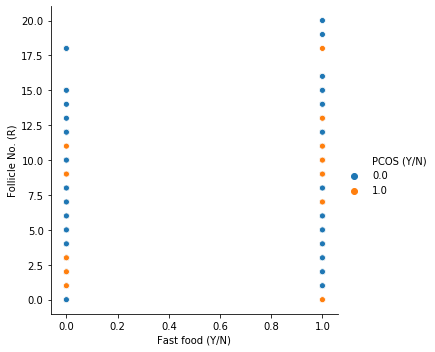

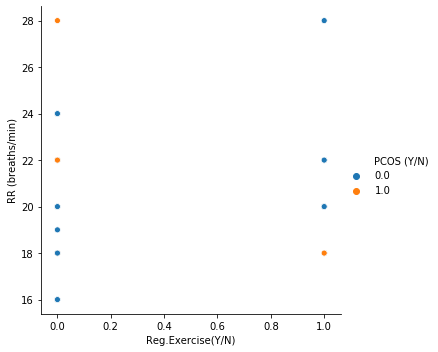

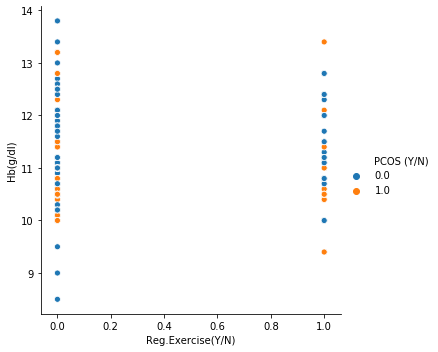

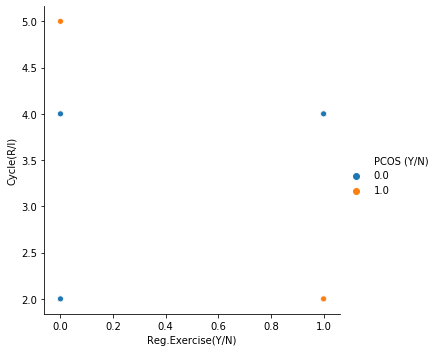

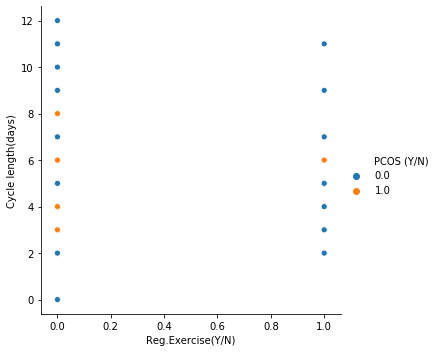

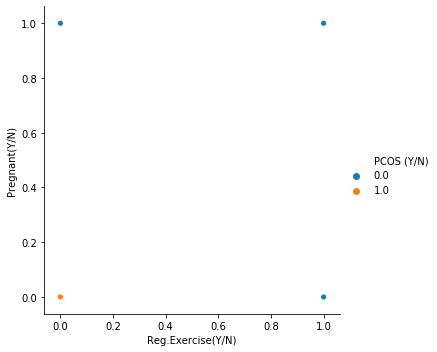

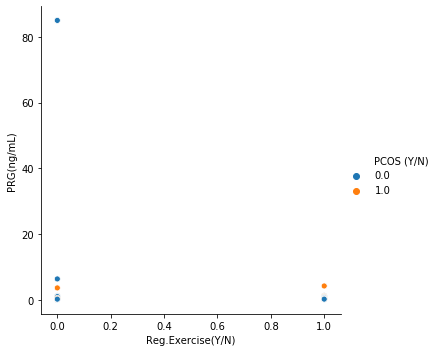

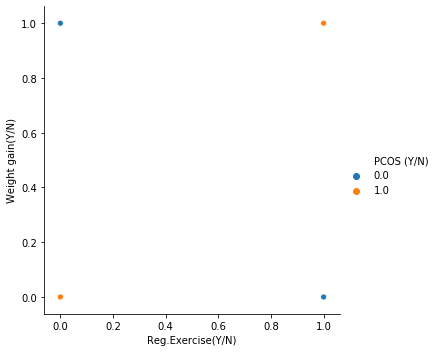

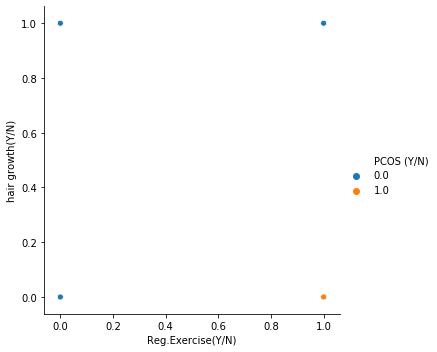

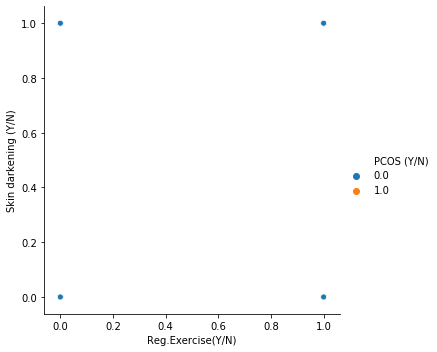

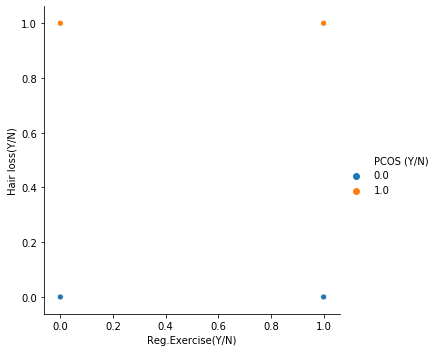

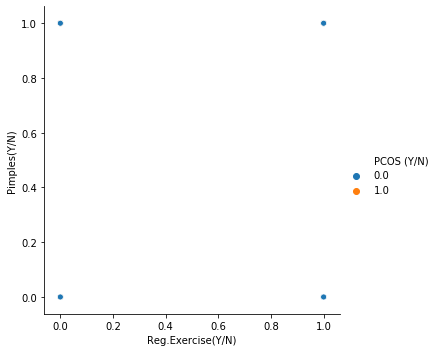

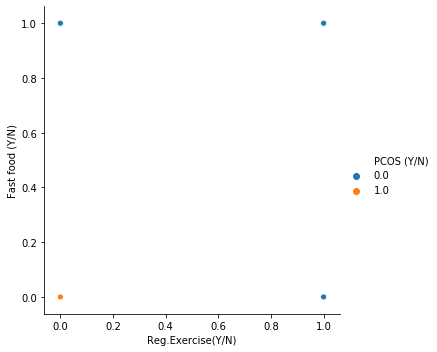

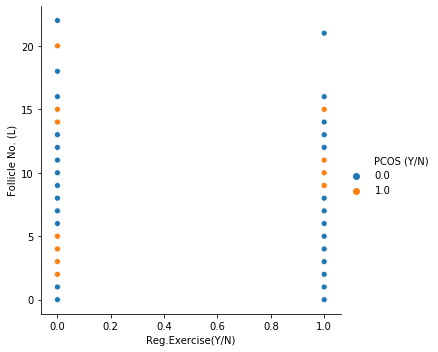

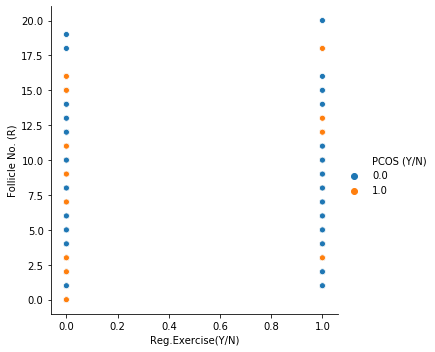

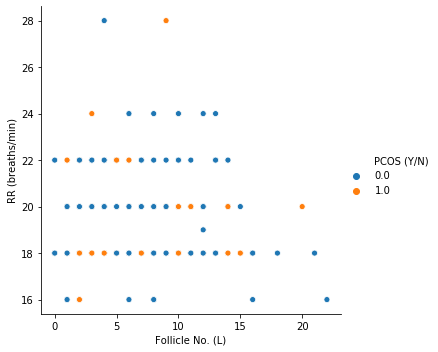

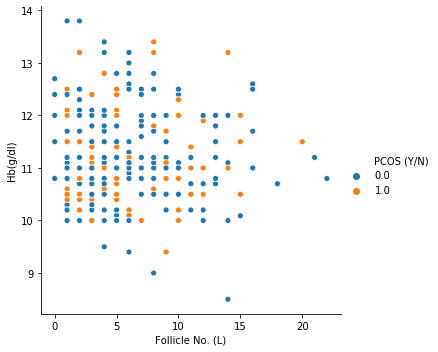

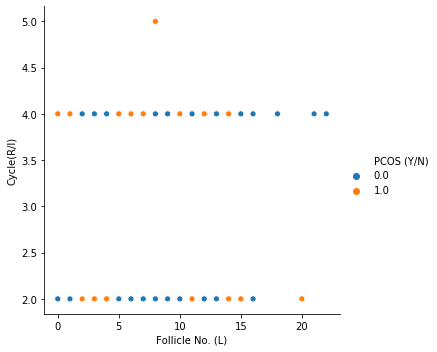

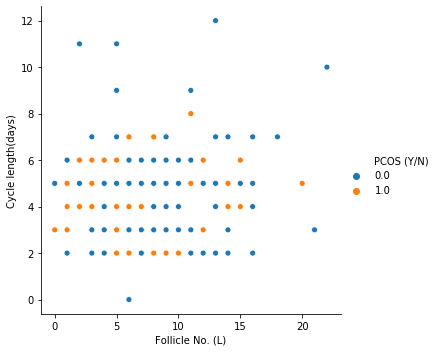

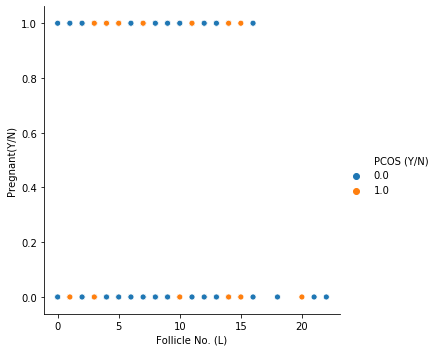

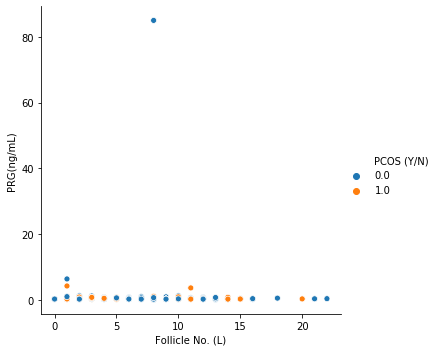

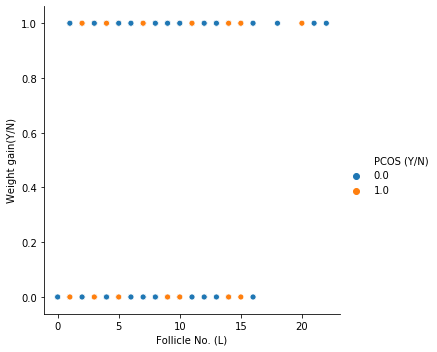

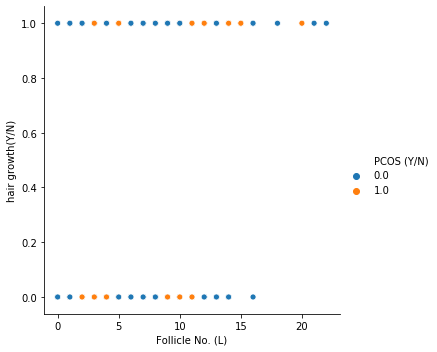

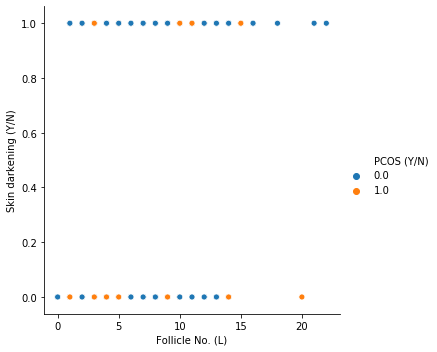

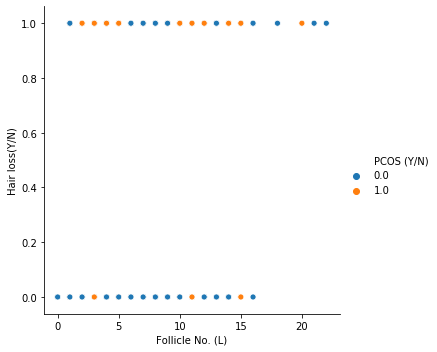

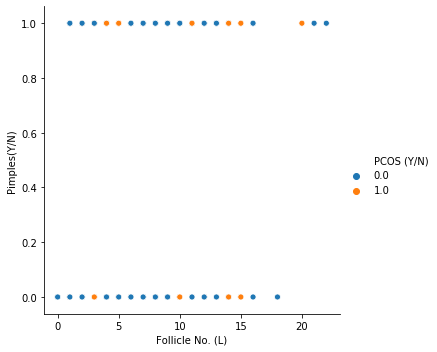

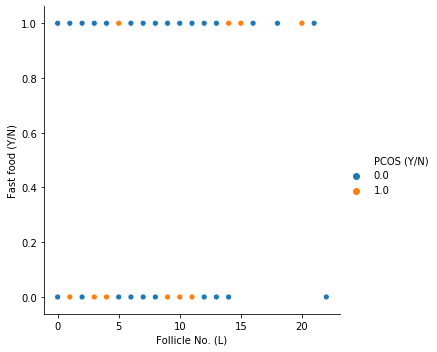

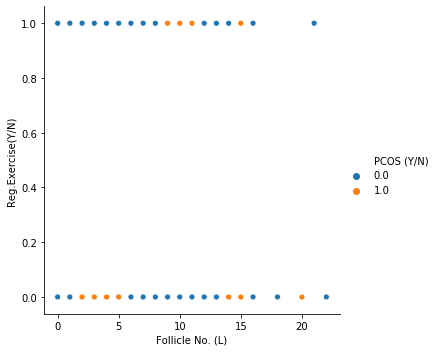

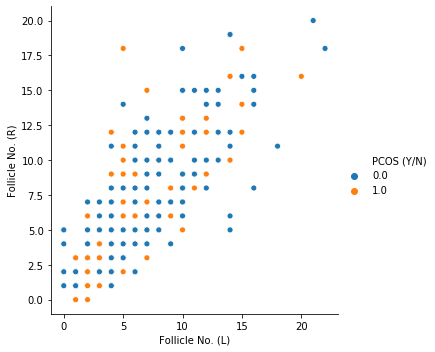

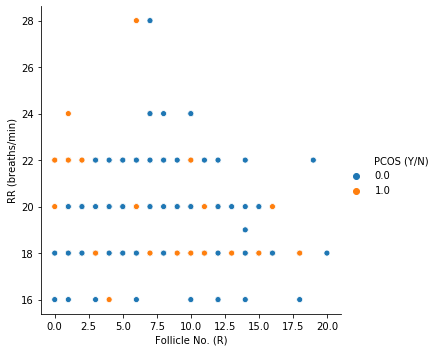

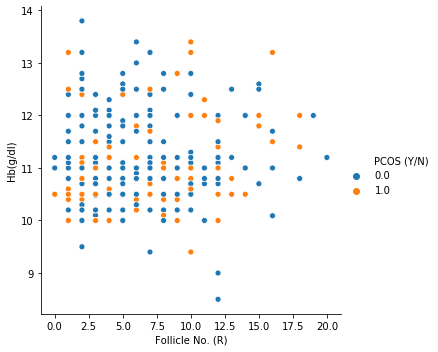

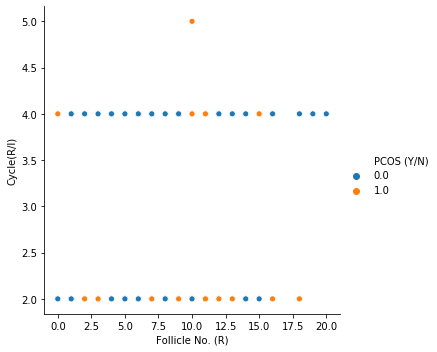

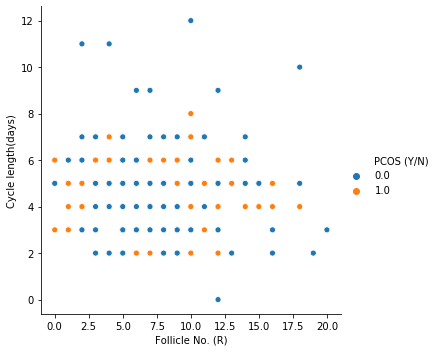

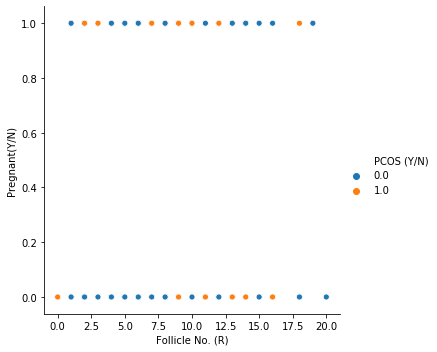

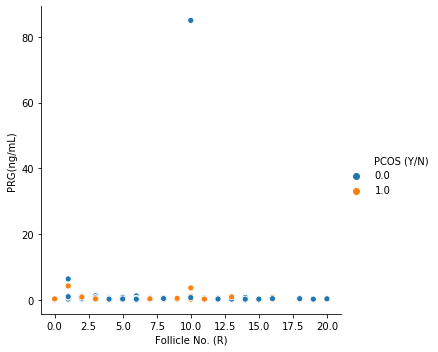

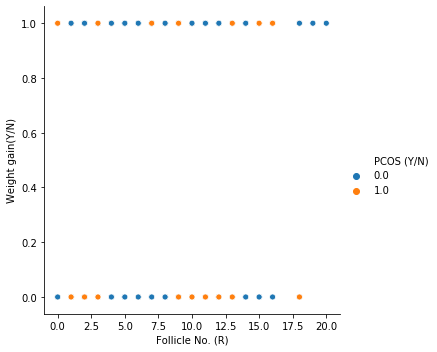

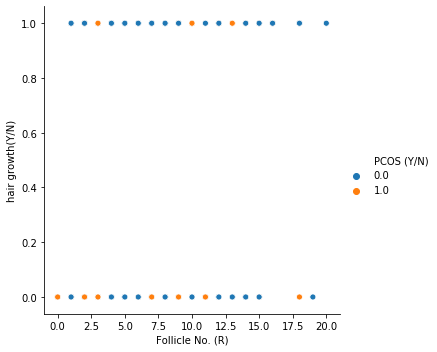

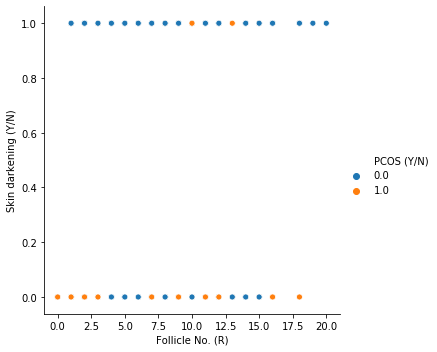

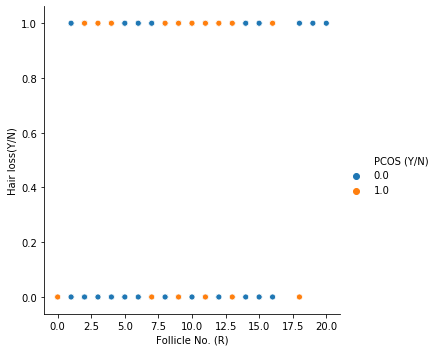

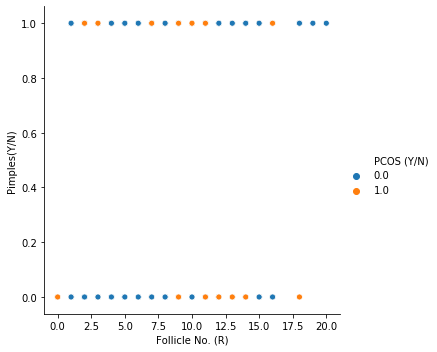

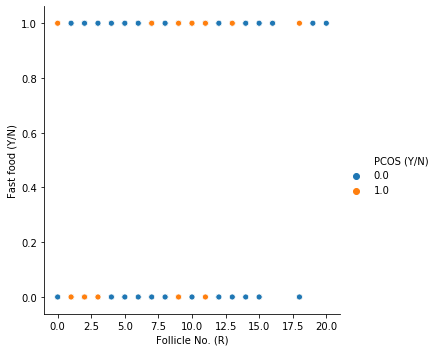

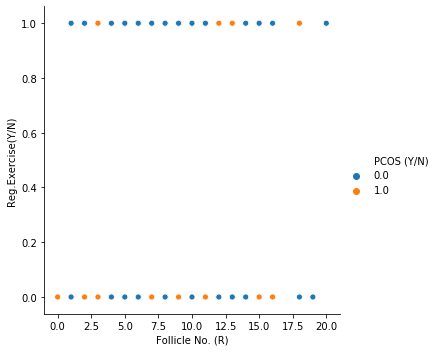

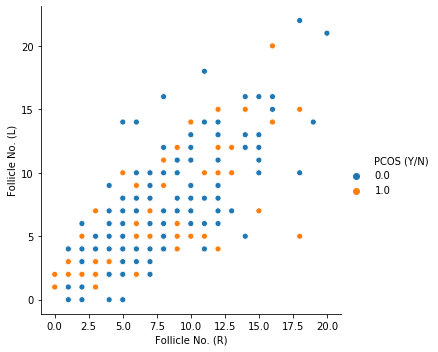

In [39]:
for f in features1:
    for f1 in features1:
        if f1!=f:
            sns.relplot(x=f,y=f1,hue='PCOS (Y/N)',data=data_refined)
            plt.show()


The above graphs show how the different feature variables are related with each other with respect to the target variable i.e. PCOS (Y/N) 

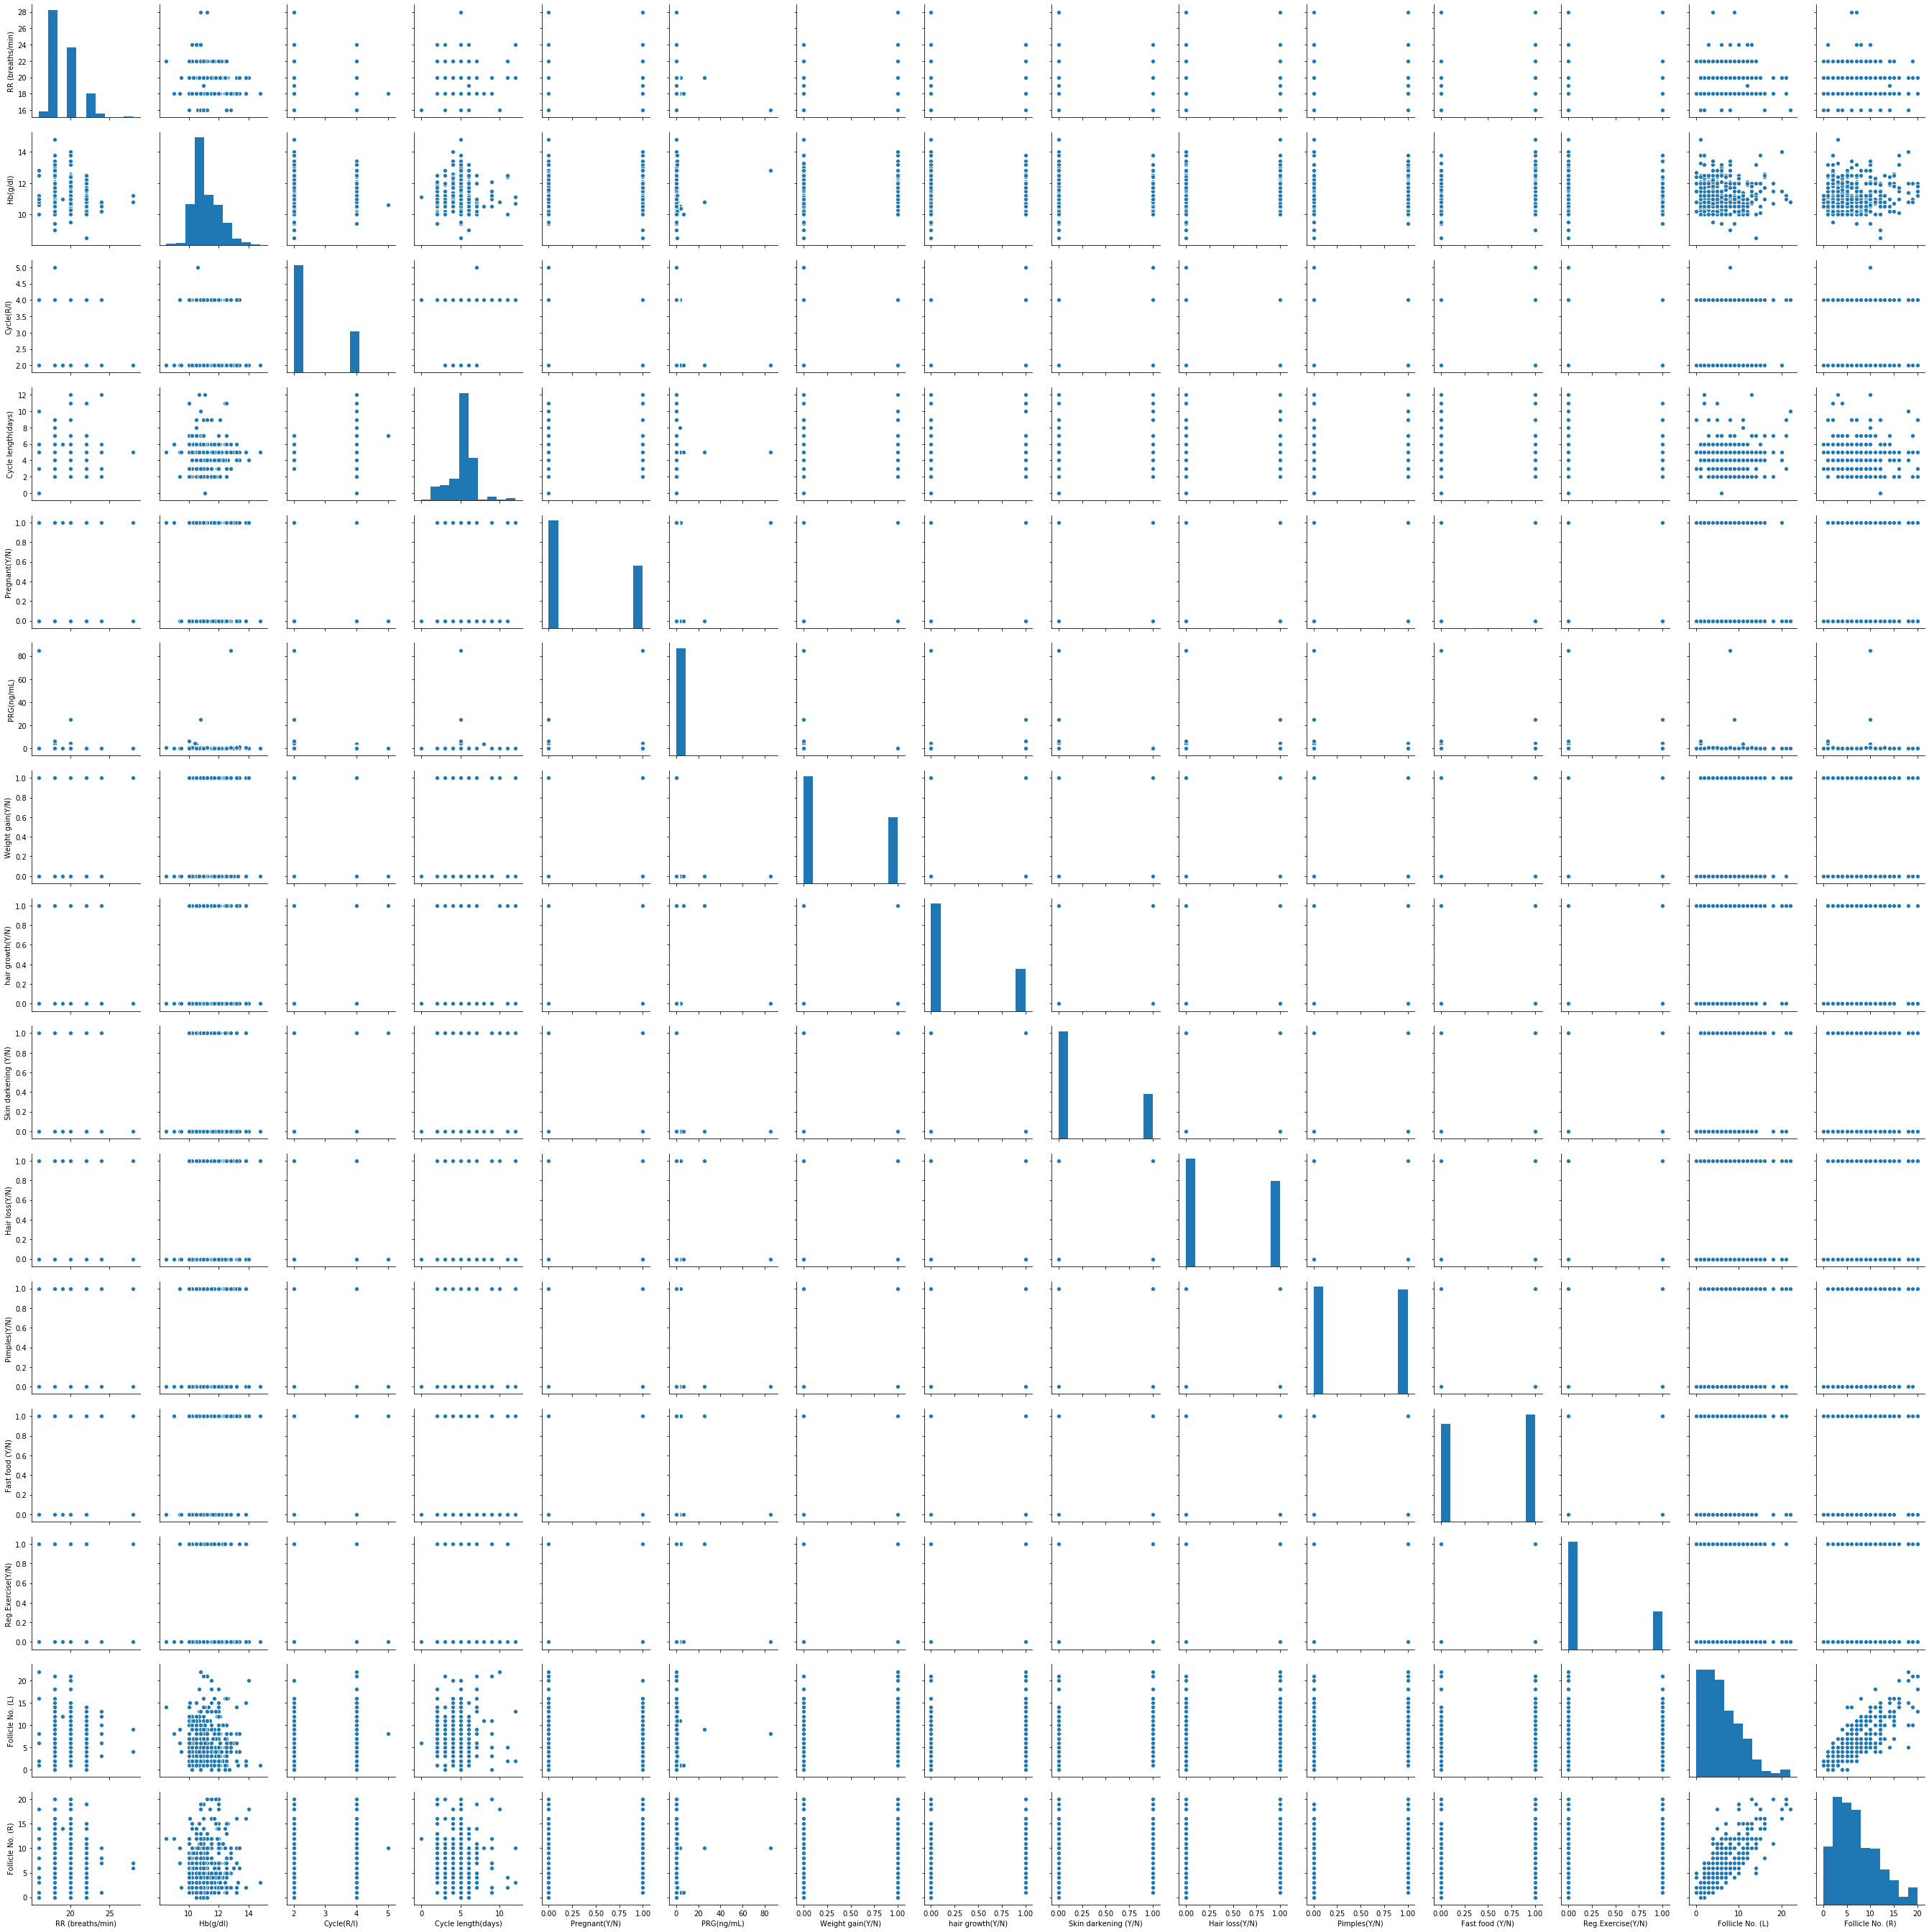

In [40]:
sns.pairplot(data=d_train_rfe)

## FITTING THE MODEL:

In [41]:
classifier.fit(x_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results:

In [42]:
y_pred = classifier.predict(x_test_rfe)

## MODEL EVALUATION:

#### Computing the confusion matrix and the accuracy of the model:

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm= confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [44]:
print(acc)

0.8715596330275229


Accuracy of the model is 0.87

In [45]:
print(cm)

[[66  4]
 [10 29]]


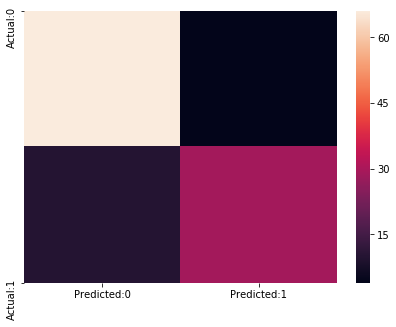

In [46]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,5))
sns.heatmap(conf_matrix, fmt='d')

The confusion matrix shows 66+29=95 correct predictions and 10+4=14 incorrect ones.

True Positives: 29  (Actual:1,Predicted:1)

True Negatives: 66  (Actual:0,Predicted:0)

False Positives: 4 (Type I error)    (Actual:0,Predicted:1)

False Negatives: 10 ( Type II error)  (Actual:1,Predicted:0)


In [47]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

## Model Evaluation - Statistics:

In [48]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8715596330275229 
 The Missclassification = 1-Accuracy =  0.12844036697247707 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.7435897435897436 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9428571428571428 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.868421052631579 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  13.01282051282051 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.27195027195027194


From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.


#### Predicted probabilities of 0 (No PCOS) and 1 ( PCOS: Yes) for the test data with a default classification threshold of 0.5


In [49]:
y_pred_prob=classifier.predict_proba(x_test_rfe)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no PCOS (0)','Prob of PCOS (1)'])
y_pred_prob_df.head()

,Prob of no PCOS (0),Prob of PCOS (1)
0,0.977340,0.022660
1,0.558172,0.441828
2,0.934869,0.065131
3,0.923138,0.076862
4,0.925196,0.074804


#### Lowering the threshold
Since the model is predicting a disease, too many type II errors is not advisable. 
A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity,threshold should be lowered

In [50]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=classifier.predict_proba(x_test_rfe)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')


With 0.1 threshold the Confusion Matrix is  
 [[45 25]
 [ 1 38]] 
 with 83 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9743589743589743 Specificity:  0.6428571428571429 



With 0.2 threshold the Confusion Matrix is  
 [[58 12]
 [ 2 37]] 
 with 95 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9487179487179487 Specificity:  0.8285714285714286 



With 0.3 threshold the Confusion Matrix is  
 [[61  9]
 [ 3 36]] 
 with 97 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.9230769230769231 Specificity:  0.8714285714285714 



With 0.4 threshold the Confusion Matrix is  
 [[65  5]
 [ 6 33]] 
 with 98 correct predictions and 6 Type II errors( False Negatives) 

 Sensitivity:  0.8461538461538461 Specificity:  0.9285714285714286 





#### Constructing the ROC curve:
A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

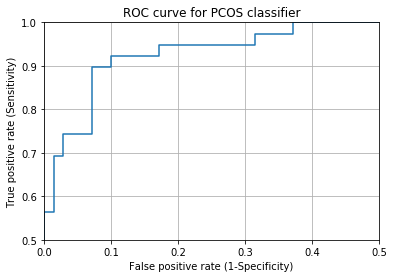

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 0.5])
plt.ylim([0.5, 1.0])
plt.title('ROC curve for PCOS classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

#### Area Under The Curve (AUC)
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1,the better.


In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9611721611721612

<div class="alert alert-info">
 <div class="panel-body">
 <font color ='black'>
    
## <U>CONCLUSIONS:</U>
 i)**Most of the features selected after the elimination process,have very low correlation except 'Follicle No.(L)' & 'Follicle      No.(R)' which have moderately high correlation**
 
 
 
 ii)**The model has an accuracy of 0.87.Model is more specific than sensitive.**
 
 
 
 iii)**As we increase the threshold from 0.1 to 0.5,the sensitivety decreases while the specificity increases.Also,the no.of          correct predictions as well as type II errors increases.So,it is advisable to keep the threshold low.**
 
 
 
 iv)**The Area under the curve(AUC) is 0.961 which is excellent.**
 
 
 
 v)**Overall,the model is good.**
 
 </div>
 </div>
 </font>

### Data Source References :
   https://www.kaggle.com/prasoonkottarathil/polycystic-ovary-syndrome-pcos#data%20without%20infertility%20_final.csv